<h1><center> Ethiopia Sorghum Crop Yield Predictions<center><h1>

<img src = 'http://www.deltafarmpress.com/sites/deltafarmpress.com/files/uploads/2015/12/GRAIN-SORGHUM.gif', width = 400>

_Author: Connie Puvvada_
_Date: November, 2017_

# A. Executive Summary
One out of nine people in the world suffers hunger every day. 75% of the people do not have enough to eat are small farmers in the developing countries. There are many factors contribute to farmers’ poverty other than bad weather and soil quality. Wars and lack of support systems largely contribute to poor financial management and food production and conversation. World hunger issue is not an easy problem to solve. However, by understanding the relationship between variables and agriculture production is a small step toward solving the hunger issue for the small farmers. 
This report is find the relationship between basic variables that have an impact on Ethiopia sorghum crop productions by comparing different regression models to make crop yield predictions. 

The following regression models were used for the prediction:
    1.    Support Vector Regression Model
    2.    Random Forest Regression Model
    3.    Gradient Boosting Regression Model
    
Model cross validation with RMSE (Root Mean Square Error, measures the error between the actual and predicted values) suggest that Random Forest Regression model is comparably a better model for sorghum crop yield prediction in Ethiopia. 

Adequate precipitation and right temperature, as expected, are the most vital factors to sorghum yield production even though the crop can tolerate drought and heat. Due to the recent warm temperature from the Indian Ocean, Ethiopia once again succumbs to drought and food crisis. It is recommended Ethiopia continue to invest water conversation projects to alleviate severe drought during winter and summer seasons.

Fertilizer, especially nitrogen, plays a vital role to the success crop yield production. Nitrogen rich soil not only improves crop yield productions but also curbs the invasive weed striga, which contributes to 50% of yield loss every year in the region. In addition to water conservation projects, fertilizer manufacturing plant investment can optimize crop yield productions for the country.



# B.	Workflow and Methodology

Below is the detail workflow for the crop yield analysis and model selection for crop yield predictions. 
1.	Research about farming, crop yields, and countries were conducted prior to data collection. There are five separated datasets downloaded from Food and Agriculture Organization (FAOSTAT.org) and The World Bank Data websites (data.worldbank.org) as csv files.
    * A.	21 years of Ethiopia historical Crop Yield Production data
    * B.	25 years of annual historical rainfall data by month
    * C.	25 years of annual historical temperature data by month
    * D.	12 years of fertilization usage data available
    * E.	15 years of inconsistent pesticides & herbicides data 
    
2.	Data then being cleaned, explored, and visualized to understand the trend of historical crop productions, the rainfall & temperature pattern, and the fertilizers and pesticide application patterns. Five datasets then melted and merged for modeling.

3.	Further research is done to determine if all the fertilizers and pesticides chemicals are pertinent to farm usage. Irrelevant features were removed to prevent modeling overfitting. 

4.	Since the prediction is a regression problem and the crop yield is not linear, three regression models are selected to compare which one make the most accurate but can also generalize the predictions.

5.	Finally, conclusion is made on the findings.

6.	Additional suggestions are made to apply the model to organizations who may help to make wise investment for the country to improve sorghum yield productions.



---

## C. Detail Coding and Analysis

In [1]:
# Import libraries for data exploration and cleaning. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

## 1. Data Cleaning and Exploratory Data Analysis

###     a. Ethiopia Historical Sorghum Crop Yield Dataset

In [2]:
# Load the historical Ethiopia sorghum crop yield dataset. 

crop_yield = pd.read_csv('datasets/FAOSTAT_data_6-28-2017 - Ethiopia_Sorghum_Yield.csv')
crop_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1993,1993,hg/ha,14018,Fc,Calculated data
1,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1994,1994,hg/ha,9319,Fc,Calculated data
2,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1995,1995,hg/ha,12401,Fc,Calculated data
3,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1996,1996,hg/ha,13575,Fc,Calculated data
4,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1997,1997,hg/ha,14136,Fc,Calculated data


In [3]:
# Check dimension and data types 
crop_yield.info()

# The data types look good.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 14 columns):
Domain Code         22 non-null object
Domain              22 non-null object
Area Code           22 non-null int64
Area                22 non-null object
Element Code        22 non-null int64
Element             22 non-null object
Item Code           22 non-null int64
Item                22 non-null object
Year Code           22 non-null int64
Year                22 non-null int64
Unit                22 non-null object
Value               22 non-null int64
Flag                22 non-null object
Flag Description    22 non-null object
dtypes: int64(6), object(8)
memory usage: 2.5+ KB


In [4]:
# Check the statistics of crop production values
crop_yield.Value.describe()

count       22.000000
mean     15438.045455
std       4069.629332
min       9319.000000
25%      12697.750000
50%      13853.000000
75%      18102.000000
max      23651.000000
Name: Value, dtype: float64

The crop yield statistics show the minimum crop yield was 9319 hectograms per hectare and the maximum was 23651 hectograms per hectare from period of 1993 to 2014. 

The statistics also show the average sorghum crop yield in Ethiopia of this period was 15438 hectograms per hectare. 

* 1 hectogram = 0.000110231 US ton

* 15435 hectograms ~ 1.7 US tons

Converting to bushels per acre, it would be 25.28 bushels per acre.

Just for comparison, U.S. produces roughly 77.9 bushels per acre. 

Let's visualize the statistics with a box plot. 


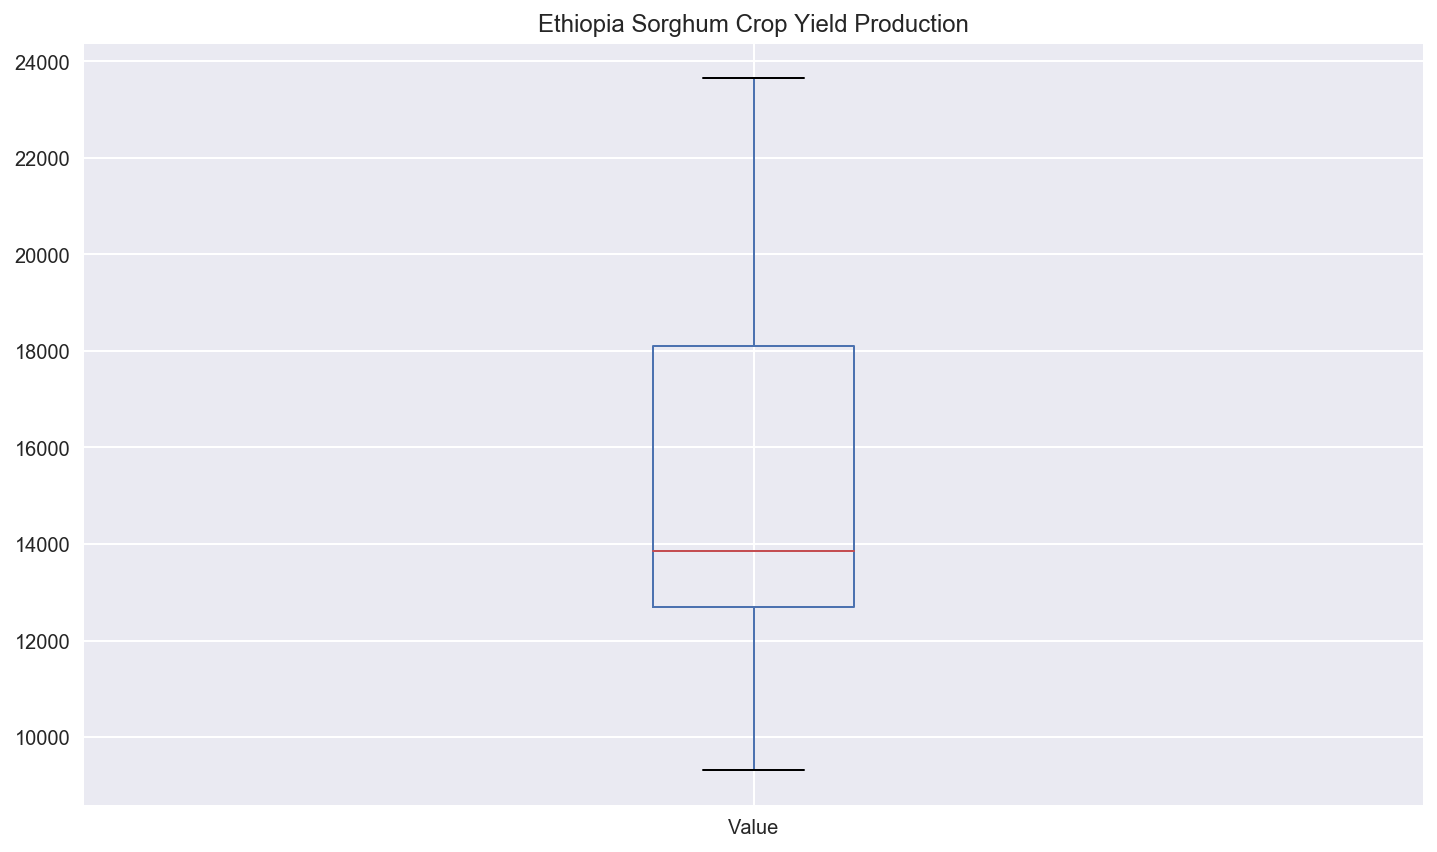

In [5]:
crop_yield.Value.plot(kind = 'box', title = 'Ethiopia Sorghum Crop Yield Production', figsize = (12, 7))
plt.show()

The box plot is a bit left skewed. Let's look at the crop yield trend during these years. 

In [6]:
# Set year as index for time-series to look at the Sorghum yield production through the years in Ethiopia
crop_yield.set_index('Year', inplace=True)
crop_yield.head(5)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Unit,Value,Flag,Flag Description
Year,,,,,,,,,,,,,
1993,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1993,hg/ha,14018,Fc,Calculated data
1994,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1994,hg/ha,9319,Fc,Calculated data
1995,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1995,hg/ha,12401,Fc,Calculated data
1996,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1996,hg/ha,13575,Fc,Calculated data
1997,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1997,hg/ha,14136,Fc,Calculated data


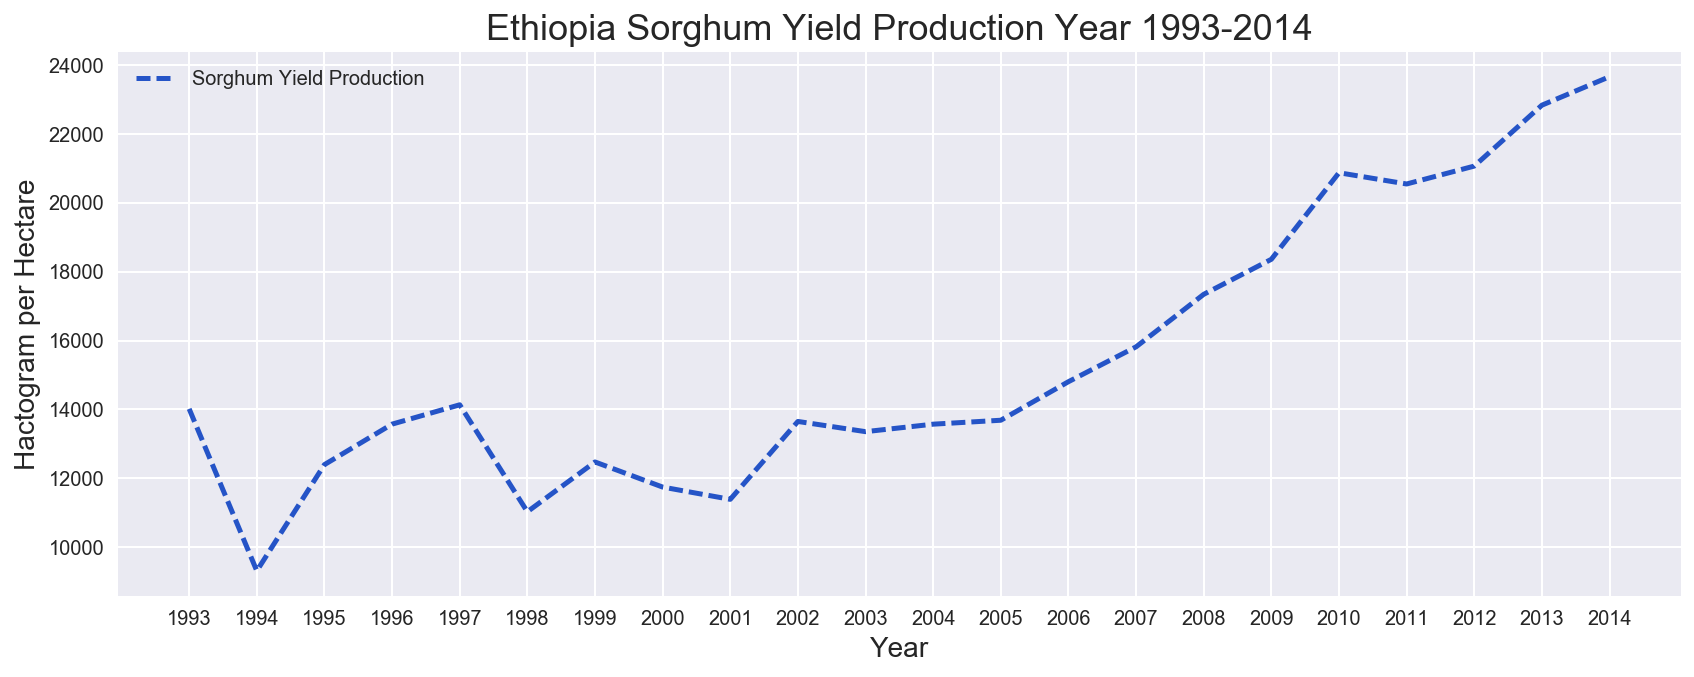

In [7]:
# Plot the yield production through the years

plt.figure(figsize = (14, 5))
plt.plot(crop_yield.Value, lw = 2.5, color = '#2554C7', ls = '--', label = 'Sorghum Yield Production')
plt.legend(loc ='best')
plt.title('Ethiopia Sorghum Yield Production Year 1993-2014', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Hactogram per Hectare', fontsize = 14)
plt.xticks(np.arange(1993, 2015, 1))
plt.show()


#### The chart shows the sorghum crop yields have improved over the years. See the dip in year of 1994? That's the year Ethiopia overthrown the dictatorship Mengistu Regime that contributed low yield production and famine in the past.

https://en.wikipedia.org/wiki/Ethiopian_Constituent_Assembly_election,_1994

This also provides a perspective the crop yield productions over the years is not quite linear. This will determine the machine learning model for prediction later. 

### b. Ethiopia Historical Sorghum Value Dataset

Now let's take a look at the sorghum value dataset.

In [8]:
# Load & sample the crop value dataset.
crop_value = pd.read_csv('datasets/FAOSTAT_data_6-28-2017_Ethiopia_Sorghum_Value.csv')
crop_value.sample(5)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
51,QV,Value of Agricultural Production,238,Ethiopia,56,Gross Production Value (current million SLC),83,Sorghum,2000,2000,SLC,1387.677440,C,Calculated
112,QV,Value of Agricultural Production,238,Ethiopia,58,Gross Production Value (constant 2004-2006 mil...,83,Sorghum,1995,1995,USD,198.724194,C,Calculated
9,QV,Value of Agricultural Production,238,Ethiopia,152,Gross Production Value (constant 2004-2006 100...,83,Sorghum,2002,2002,1000 Int. $,237816.358900,*,Unofficial figure
81,QV,Value of Agricultural Production,238,Ethiopia,55,Gross Production Value (constant 2004-2006 mil...,83,Sorghum,2008,2008,SLC,4015.284790,C,Calculated
114,QV,Value of Agricultural Production,238,Ethiopia,58,Gross Production Value (constant 2004-2006 mil...,83,Sorghum,1997,1997,USD,355.458318,C,Calculated


Looks like the crop value dataset is a mix of different unit measurement. Let's explore a bit further sorting by years. 

In [9]:
crop_value.sort_values(by='Year Code')[:20]

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QV,Value of Agricultural Production,238,Ethiopia,152,Gross Production Value (constant 2004-2006 100...,83,Sorghum,1993,1993,1000 Int. $,96636.437440,*,Unofficial figure
88,QV,Value of Agricultural Production,238,Ethiopia,57,Gross Production Value (current million US$),83,Sorghum,1993,1993,USD,138.227980,C,Calculated
66,QV,Value of Agricultural Production,238,Ethiopia,55,Gross Production Value (constant 2004-2006 mil...,83,Sorghum,1993,1993,SLC,948.746590,C,Calculated
44,QV,Value of Agricultural Production,238,Ethiopia,56,Gross Production Value (current million SLC),83,Sorghum,1993,1993,SLC,691.139900,C,Calculated
110,QV,Value of Agricultural Production,238,Ethiopia,58,Gross Production Value (constant 2004-2006 mil...,83,Sorghum,1993,1993,USD,109.458319,C,Calculated
22,QV,Value of Agricultural Production,238,Ethiopia,154,Net Production Value (constant 2004-2006 1000 I$),83,Sorghum,1993,1993,1000 Int. $,94317.103880,*,Unofficial figure
67,QV,Value of Agricultural Production,238,Ethiopia,55,Gross Production Value (constant 2004-2006 mil...,83,Sorghum,1994,1994,SLC,1060.944120,C,Calculated
89,QV,Value of Agricultural Production,238,Ethiopia,57,Gross Production Value (current million US$),83,Sorghum,1994,1994,USD,181.277753,C,Calculated
111,QV,Value of Agricultural Production,238,Ethiopia,58,Gross Production Value (constant 2004-2006 mil...,83,Sorghum,1994,1994,USD,122.402717,C,Calculated
23,QV,Value of Agricultural Production,238,Ethiopia,154,Net Production Value (constant 2004-2006 1000 I$),83,Sorghum,1994,1994,1000 Int. $,105235.065400,*,Unofficial figure


Each year, there are 6 different elements showing different unit measurements. To keep it simple, I will just look at the net production values (constant 2004-2006)


In [10]:
net_crop_value = crop_value[crop_value.Element == 'Net Production Value (constant 2004-2006 1000 I$)']

net_crop_value.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
22,QV,Value of Agricultural Production,238,Ethiopia,154,Net Production Value (constant 2004-2006 1000 I$),83,Sorghum,1993,1993,1000 Int. $,94317.10388,*,Unofficial figure
23,QV,Value of Agricultural Production,238,Ethiopia,154,Net Production Value (constant 2004-2006 1000 I$),83,Sorghum,1994,1994,1000 Int. $,105235.06540,*,Unofficial figure
24,QV,Value of Agricultural Production,238,Ethiopia,154,Net Production Value (constant 2004-2006 1000 I$),83,Sorghum,1995,1995,1000 Int. $,171349.65270,*,Unofficial figure
25,QV,Value of Agricultural Production,238,Ethiopia,154,Net Production Value (constant 2004-2006 1000 I$),83,Sorghum,1996,1996,1000 Int. $,273591.44620,*,Unofficial figure
26,QV,Value of Agricultural Production,238,Ethiopia,154,Net Production Value (constant 2004-2006 1000 I$),83,Sorghum,1997,1997,1000 Int. $,310800.32510,*,Unofficial figure


In [11]:
# Check crop value dataset dimension and data types
net_crop_value.info()

# Data types look good as well.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 22 to 43
Data columns (total 14 columns):
Domain Code         22 non-null object
Domain              22 non-null object
Area Code           22 non-null int64
Area                22 non-null object
Element Code        22 non-null int64
Element             22 non-null object
Item Code           22 non-null int64
Item                22 non-null object
Year Code           22 non-null int64
Year                22 non-null int64
Unit                22 non-null object
Value               22 non-null float64
Flag                22 non-null object
Flag Description    22 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 2.6+ KB


In [12]:
# Check the crop value statistics
net_crop_value.Value.describe()

count        22.000000
mean     331725.368781
std      172473.490734
min       94317.103880
25%      210017.605575
50%      272036.343150
75%      439367.634925
max      661732.635600
Name: Value, dtype: float64

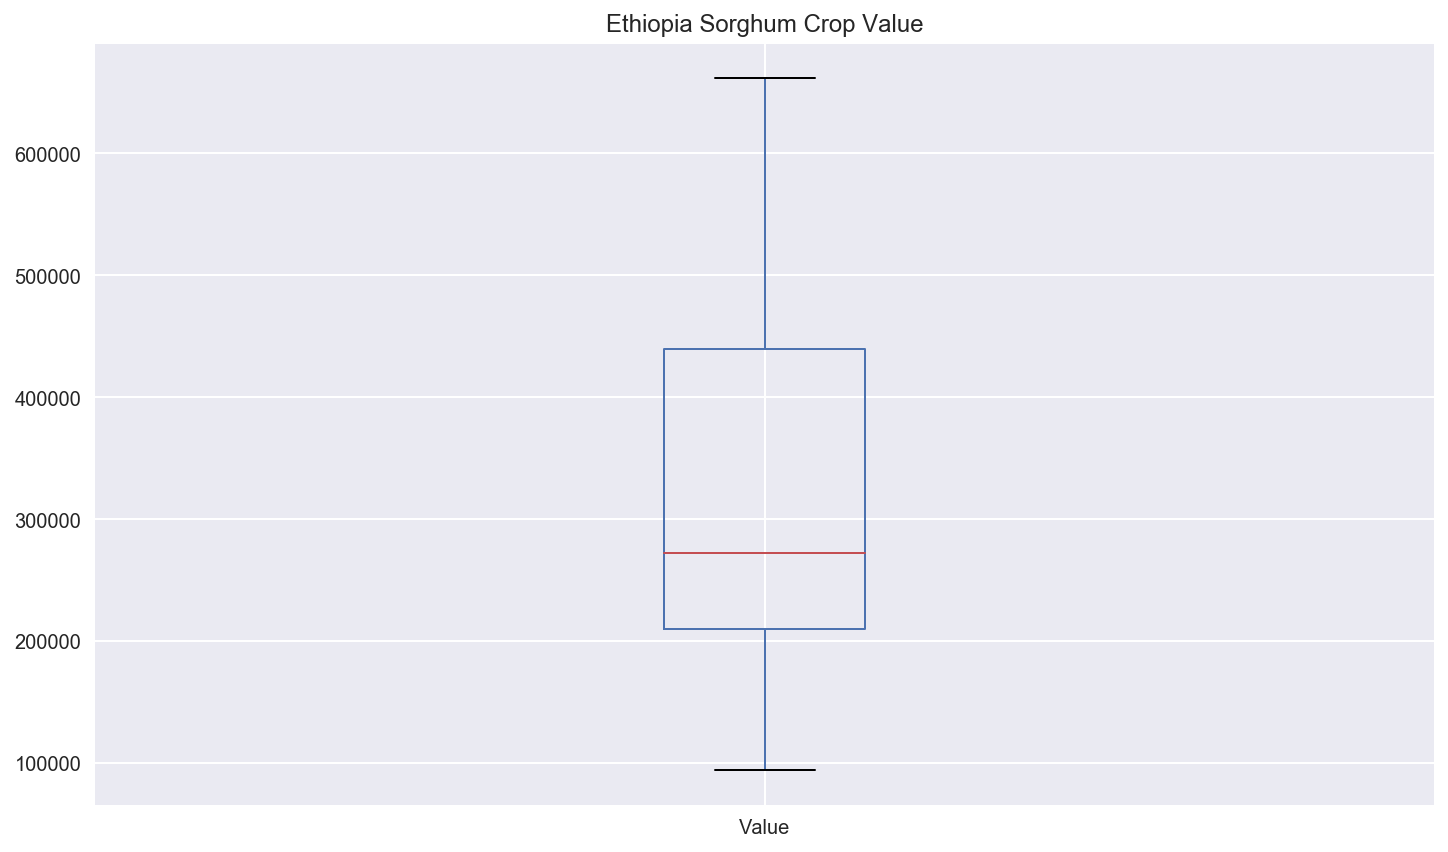

In [13]:
# plot the statistics
net_crop_value.Value.plot(kind = 'box', title = 'Ethiopia Sorghum Crop Value', figsize = (12, 7))
plt.show()

# The crop value is very similar to the production.

In [14]:
# Set the year as index for time series to look at the crop value over the years
net_crop_value.set_index('Year', inplace = True )
net_crop_value.head()


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Unit,Value,Flag,Flag Description
Year,,,,,,,,,,,,,
1993,QV,Value of Agricultural Production,238,Ethiopia,154,Net Production Value (constant 2004-2006 1000 I$),83,Sorghum,1993,1000 Int. $,94317.10388,*,Unofficial figure
1994,QV,Value of Agricultural Production,238,Ethiopia,154,Net Production Value (constant 2004-2006 1000 I$),83,Sorghum,1994,1000 Int. $,105235.06540,*,Unofficial figure
1995,QV,Value of Agricultural Production,238,Ethiopia,154,Net Production Value (constant 2004-2006 1000 I$),83,Sorghum,1995,1000 Int. $,171349.65270,*,Unofficial figure
1996,QV,Value of Agricultural Production,238,Ethiopia,154,Net Production Value (constant 2004-2006 1000 I$),83,Sorghum,1996,1000 Int. $,273591.44620,*,Unofficial figure
1997,QV,Value of Agricultural Production,238,Ethiopia,154,Net Production Value (constant 2004-2006 1000 I$),83,Sorghum,1997,1000 Int. $,310800.32510,*,Unofficial figure


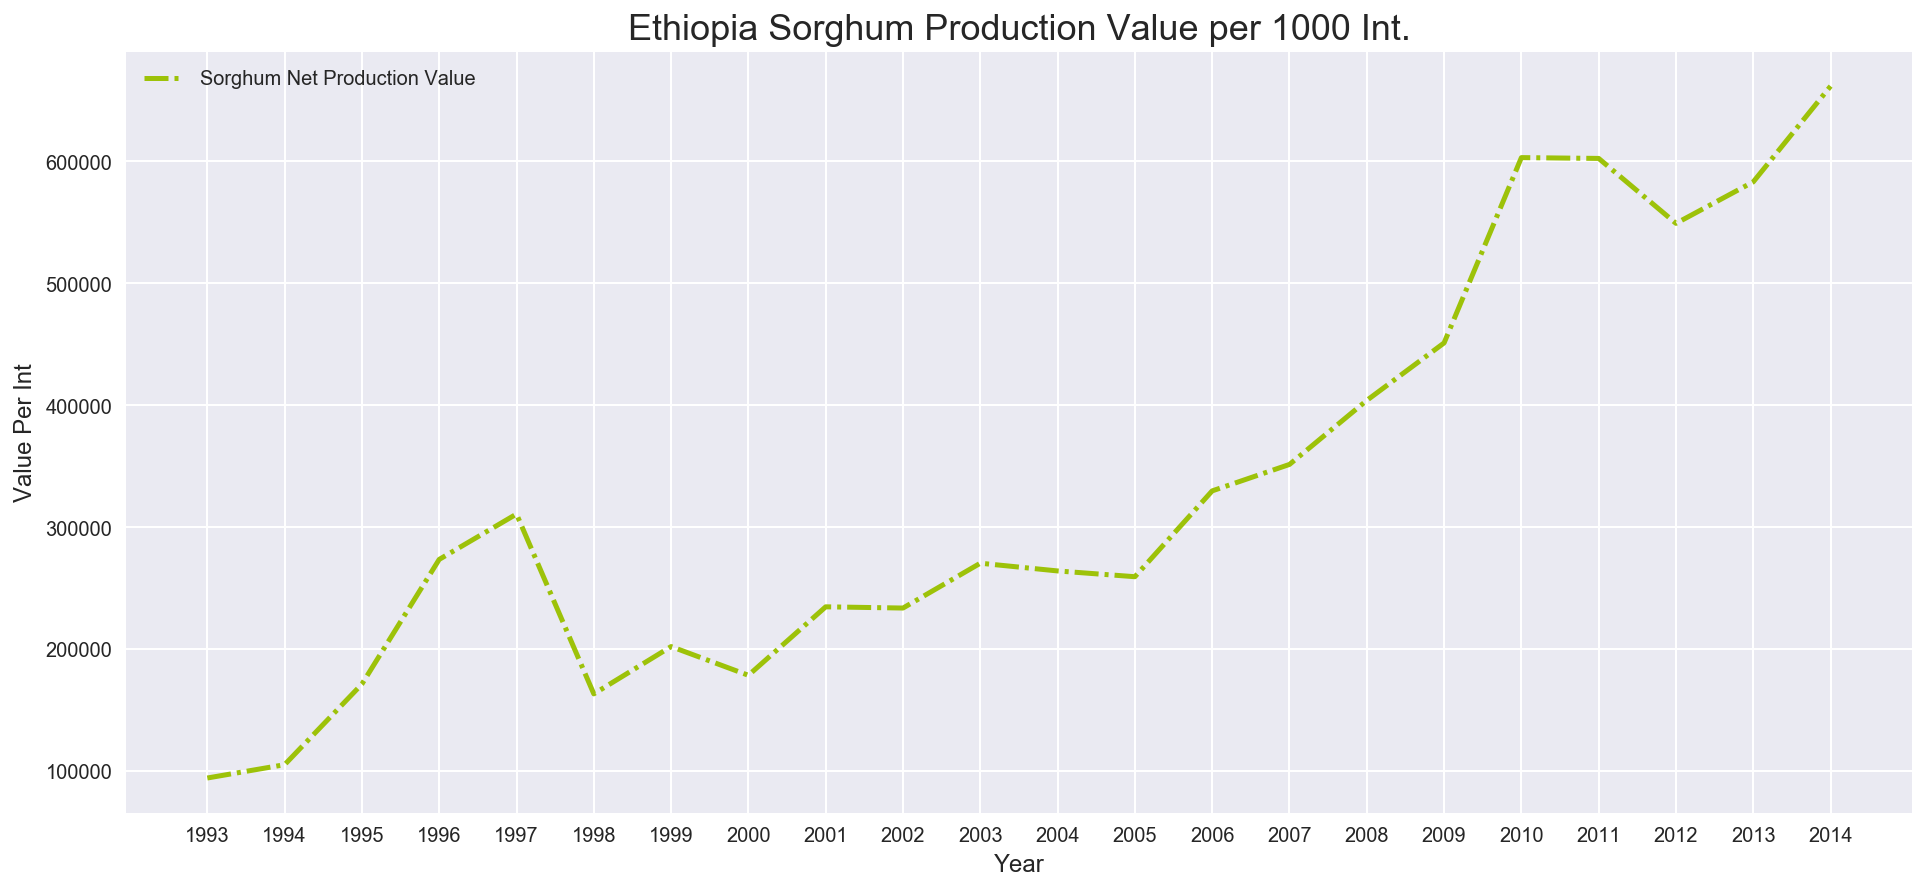

In [15]:
plt.figure(figsize = (16, 7))
plt.plot(net_crop_value.Value, lw = 2.5, color = '#9DC209', ls = '-.', label = 'Sorghum Net Production Value')
plt.legend(loc ='best')
plt.title('Ethiopia Sorghum Production Value per 1000 Int.', fontsize = 18)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Value Per Int', fontsize = 12)
plt.xticks(np.arange(1993, 2015, 1))
plt.show()

#### The yield production and the crop value datasets look very similar. 

#### The crop yield production and value started to climb up since year 2005. 

#### Since we are trying to make a prediction on the crop yield production, I will keep the crop yield dataset. 

### c. Ethiopia Historical Precipitation Dataset

Now let's look at the precipitation. 

In [16]:
rain = pd.read_csv('datasets/Ethiopia Historical Rain_1991_2015.csv')
rain.head()

,Rainfall (mm),Year,Month,Country
0,13.0865,1991,1,ETH
1,21.1366,1991,2,ETH
2,65.6054,1991,3,ETH
3,75.2780,1991,4,ETH
4,81.0750,1991,5,ETH


In [17]:
# Check the data types in the rain dataset 
rain.info()
# It looks good, no null value and the data types look good. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
Rainfall (mm)    300 non-null float64
	Year            300 non-null int64
 Month           300 non-null int64
 Country         300 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 9.4+ KB


In [18]:
# Change the rainfall column name for easy handling later.

rain.columns = ['rain_in_mm', 'year', 'month', 'country']

In [19]:
# check year and month value
rain.groupby('year')[['rain_in_mm']].sum().describe()


,rain_in_mm
count,25.000000
mean,804.768136
std,67.089886
min,662.399200
25%,765.512400
50%,817.136310
75%,847.162500
max,967.529140


In [20]:

# Combine the month and year together for timeseries to look at the rainfall through the years and months

rain['yearmonth'] = rain.apply(lambda x: datetime.strptime('{0} {1}'.format(x['year'], x['month']), '%Y %m'), axis=1)
rain.index = rain['yearmonth']
rain.head()

,rain_in_mm,year,month,country,yearmonth
yearmonth,,,,,
1991-01-01,13.0865,1991,1,ETH,1991-01-01
1991-02-01,21.1366,1991,2,ETH,1991-02-01
1991-03-01,65.6054,1991,3,ETH,1991-03-01
1991-04-01,75.2780,1991,4,ETH,1991-04-01
1991-05-01,81.0750,1991,5,ETH,1991-05-01


In [21]:
annual_rainfall= rain.groupby(['year'])[['rain_in_mm']].sum()
annual_rainfall.head()

,rain_in_mm
year,
1991,765.51240
1992,732.29820
1993,791.86912
1994,817.13631
1995,711.57019


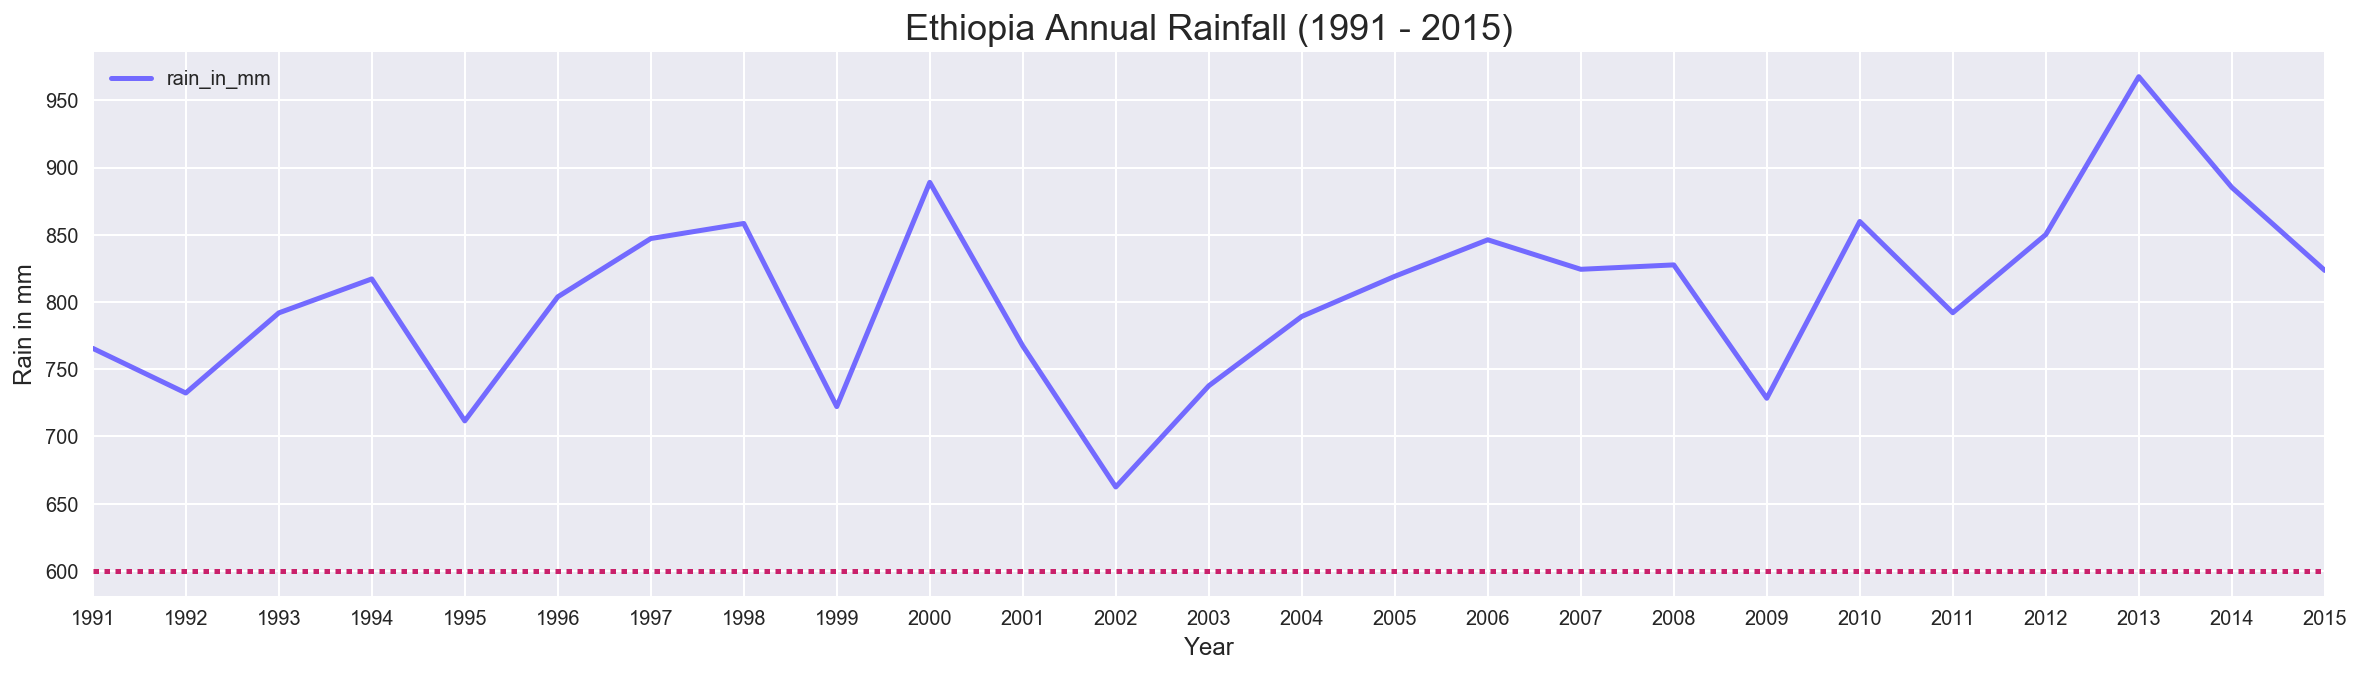

In [22]:
# Plot the annual rainfall pattern.
annual_rainfall.plot(figsize = (20, 5), color = '#736AFF', lw = 2.5)
plt.title ('Ethiopia Annual Rainfall (1991 - 2015)', fontsize = 18)
plt.xlabel('Year', fontsize= 12)
plt.ylabel('Rain in mm', fontsize = 12)
plt.xticks(np.arange(1991, 2016, 1))
ax = plt.gca()
ax.axhline(600, ls = ':', lw = 2.5, color = '#CA226B')
plt.show()

#### The rainfall in Ethiopia varies from year to year. I wonder why? It almost seems like the rainfall has improving. Year 2002 was in severe drought. That's the year of famine. 

#### Research shows sorghum is a very resilient crop requiring only 600mm (23.6 inches, the pink dot line) annual rainfall to grow. Even though year 2002 was very dry, there should be sufficient rain fall for sorghum. Let's explore further. 

#### Let's plot the rainfall over years in a bar chart. 


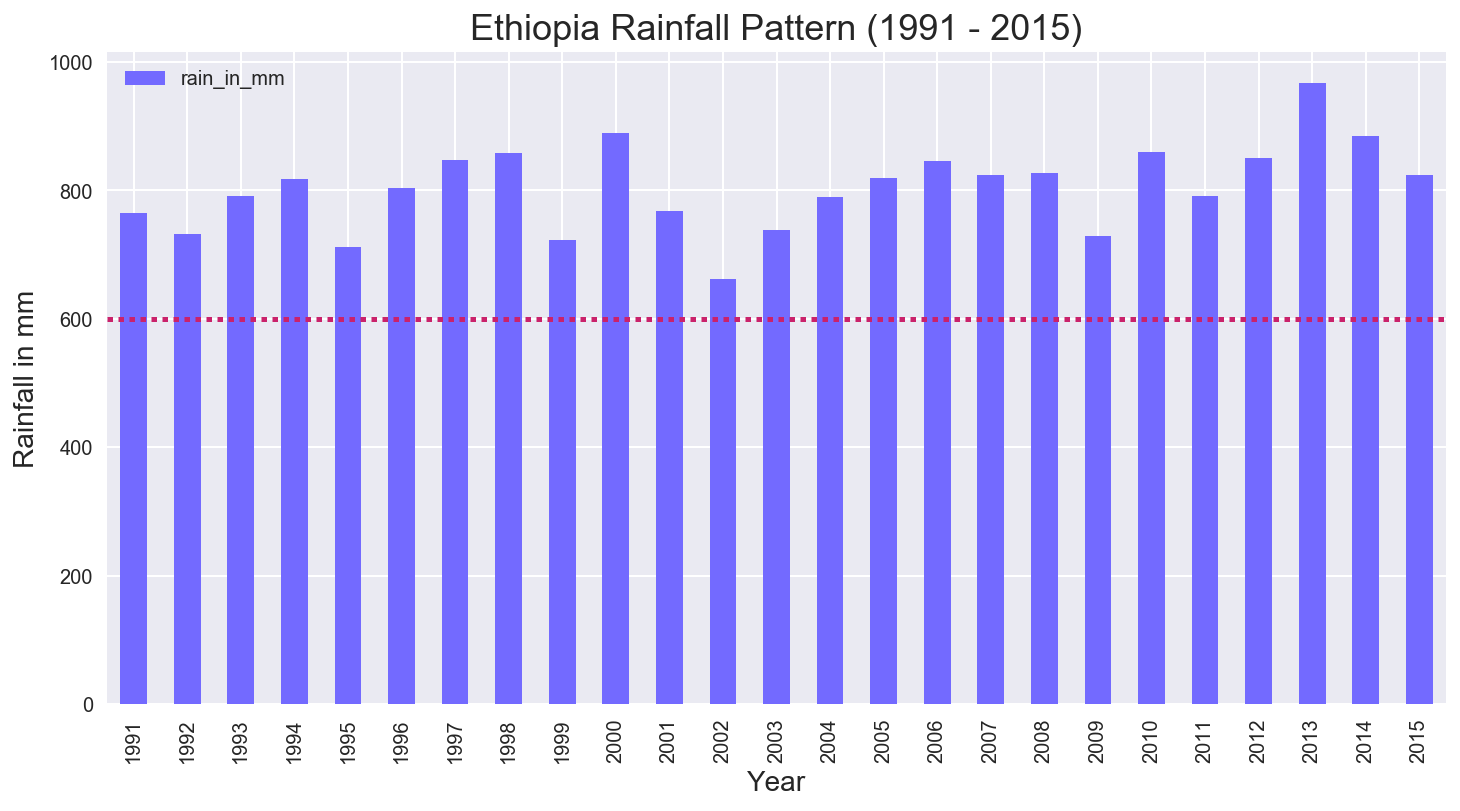

In [23]:
annual_rainfall.plot(kind = 'bar', figsize = (12, 6), grid=True, color = '#736AFF')
ax = plt.gca()
ax.axhline(600, ls = ':', lw = 2.5, color = '#CA226B')
plt.title('Ethiopia Rainfall Pattern (1991 - 2015)', fontsize = 18)
plt.xlabel ('Year', fontsize = 14)
plt.ylabel ('Rainfall in mm', fontsize = 14)
plt.show()

#### Even though Ethiopia total annual rainfall has more than 600mm (about 23.6 inches). But rainfall fluctuates year by year. Some years barely have sufficient rainfall. Making sorghum, compared to other crops, an ideal crop for Ethiopia because sorghum requires about average 600mm rain to grow.

#### Look at a few drought years 2002 & 2009

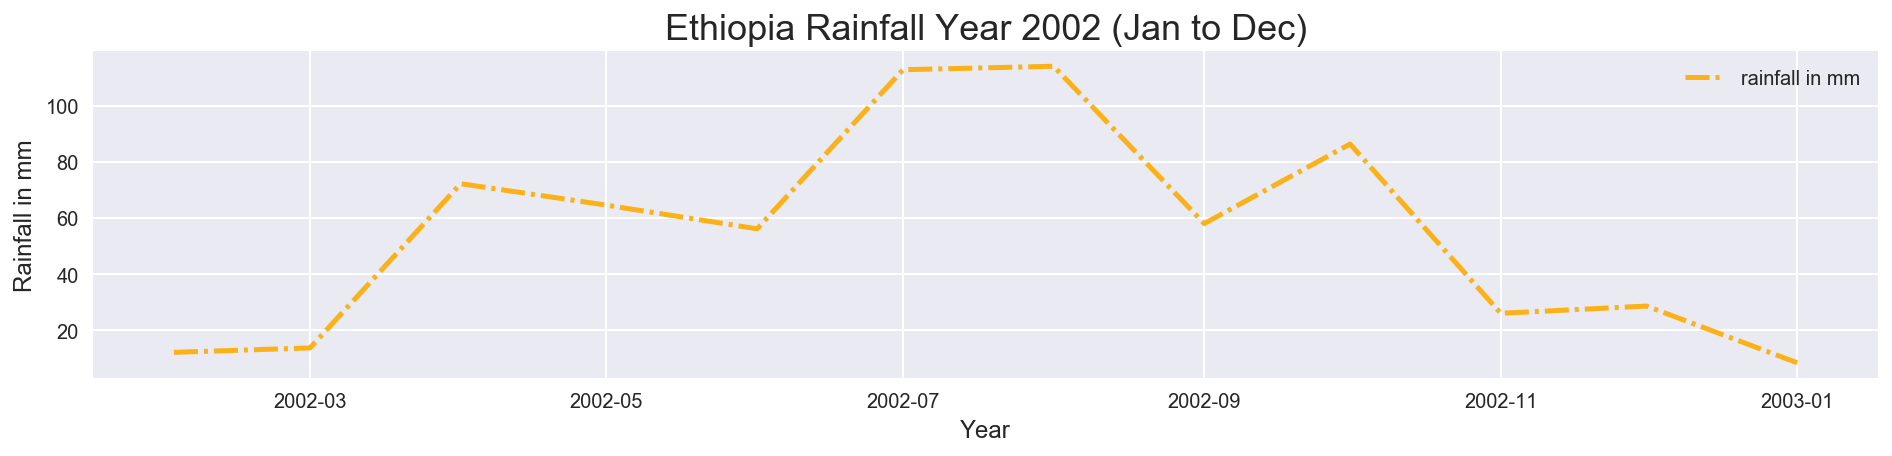

In [24]:
plt.figure(figsize = (16, 3))
plt.plot(rain.rain_in_mm[133:145], lw = 2.5, color = '#FBB117', ls = '-.', label = 'rainfall in mm')
plt.legend(loc ='best')
plt.title('Ethiopia Rainfall Year 2002 (Jan to Dec)', fontsize = 18)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Rainfall in mm', fontsize = 12)
plt.show()


#### Look, some months' rainfall was below 20 mm, approximately half an inch of rainfall, especially winter. 

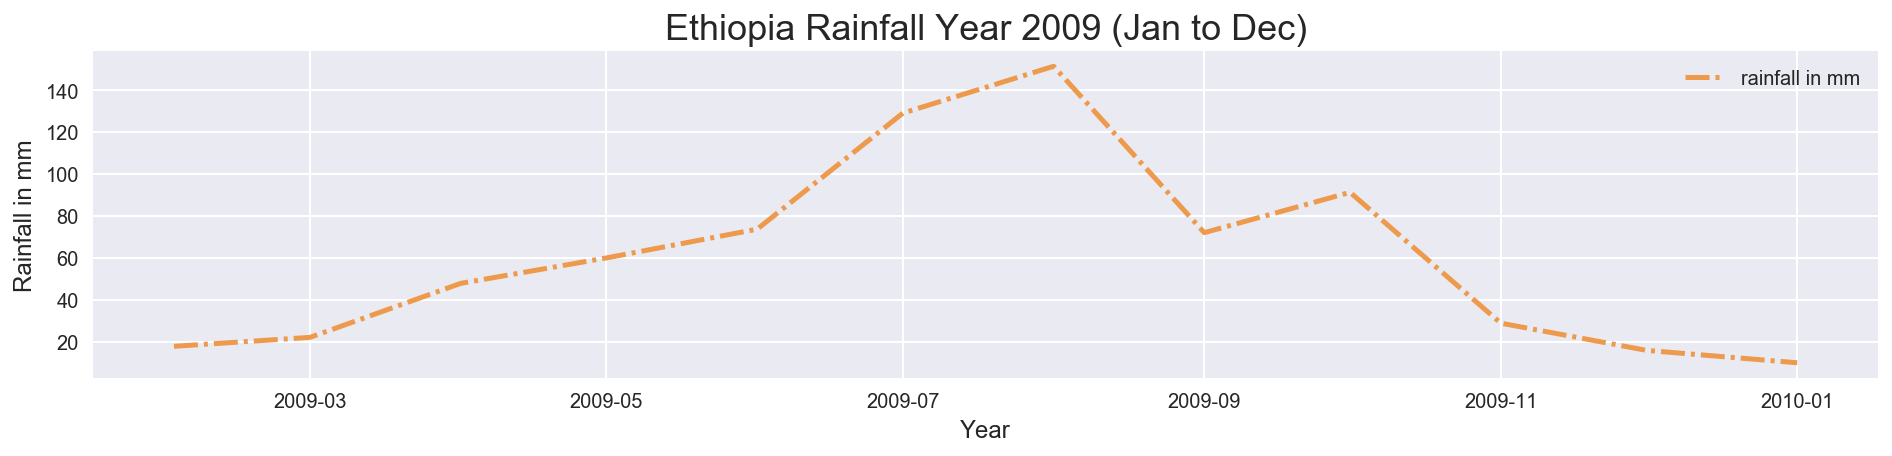

In [25]:

plt.figure(figsize = (16, 3))
plt.plot(rain.rain_in_mm[217:229], lw = 2.5, color = '#EE9A4D', ls = '-.', label = 'rainfall in mm')
plt.legend(loc ='best')
plt.title('Ethiopia Rainfall Year 2009 (Jan to Dec)', fontsize = 18)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Rainfall in mm', fontsize = 12)
plt.show()

# Same for year 2009. 

In [26]:

# Let's look at the average monthly rainfall
avg_monthly_rainfall= rain.groupby(['month'])[['rain_in_mm']].mean()
avg_monthly_rainfall


,rain_in_mm
month,
1,12.390554
2,12.524726
3,38.283636
4,78.200684
5,97.749196
6,75.349472
7,127.541016
8,142.246280
9,91.263276


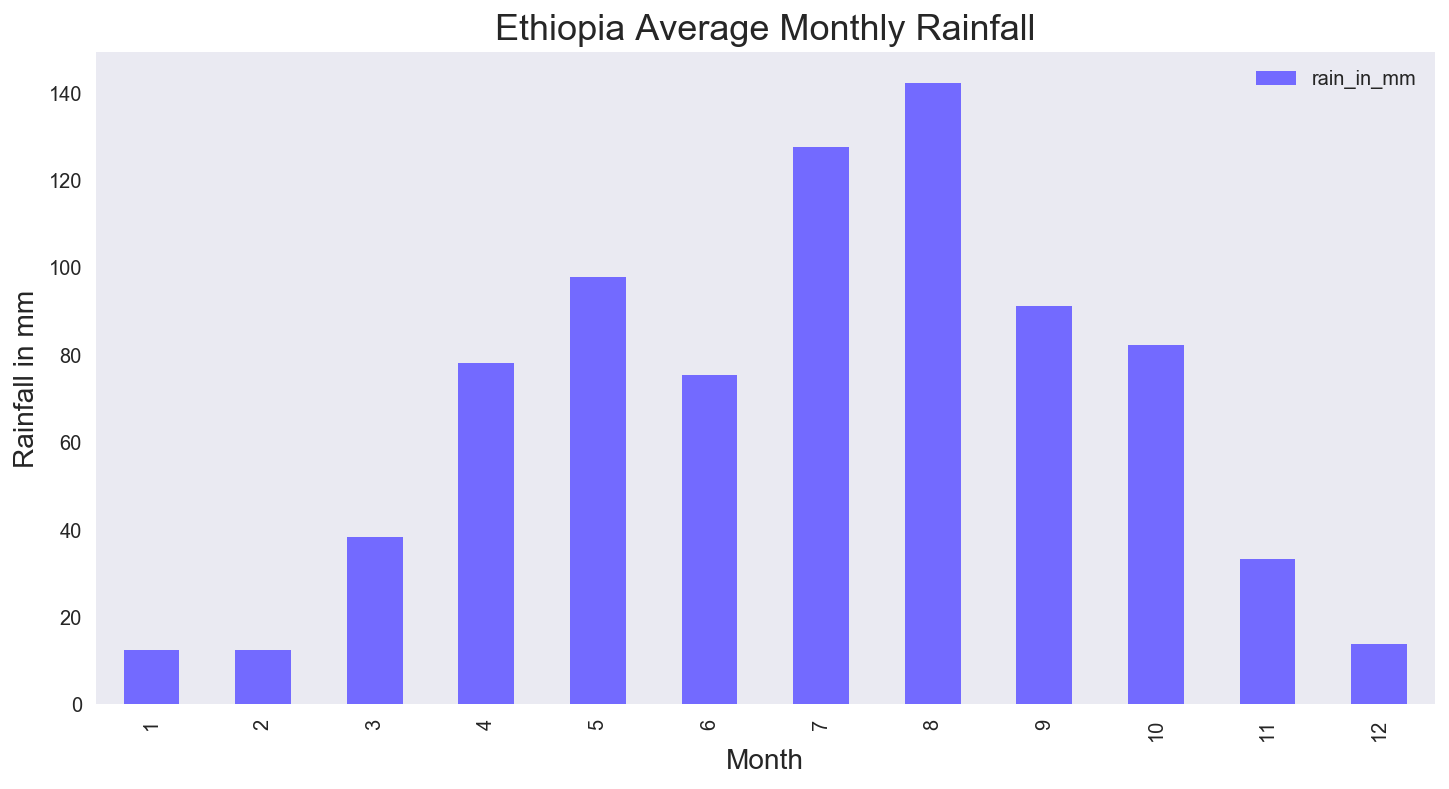

In [27]:
# Plot the annual average rainfall by month

avg_monthly_rainfall.plot(kind = 'bar', figsize = (12, 6), grid=True, color = '#736AFF')
plt.title('Ethiopia Average Monthly Rainfall', fontsize = 18)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Rainfall in mm', fontsize = 14)
plt.grid()
plt.show()

#### The above chart shows the average monthly rainfall. July and August are the rain season in Ethiopia. Winter is extremely dry. 

### d. Ethiopia Histrorical Temperature Dataset

Now let's explore the temperature dataset.

In [28]:
# Load the temperature dataset.
temperature = pd.read_csv('datasets/Ethiopia Historical Temp_1991_2015.csv')
temperature.head()
                          

,Temperature (C),Year,Month,Country
0,21.8524,1991,1,ETH
1,22.3767,1991,2,ETH
2,23.5291,1991,3,ETH
3,24.7054,1991,4,ETH
4,23.9450,1991,5,ETH


In [29]:
# Change the temperature column name for easy handling later.

temperature.columns = ['temperature_in_C', 'year', 'month', 'country']

In [30]:
# Check the temperature dimension and datatypes
temperature.temperature_in_C.describe()

count    300.000000
mean      22.973923
std        1.272685
min       17.099500
25%       22.132500
50%       23.031650
75%       23.912375
max       25.486300
Name: temperature_in_C, dtype: float64

In [31]:
# Calculate the average monthly temperature
avg_monthly_temp = temperature.groupby(['month'])[['temperature_in_C']].mean()
avg_monthly_temp

,temperature_in_C
month,
1,21.496884
2,22.815424
3,23.971008
4,24.713020
5,24.452632
6,23.983672
7,23.104368
8,22.796716
9,23.130216


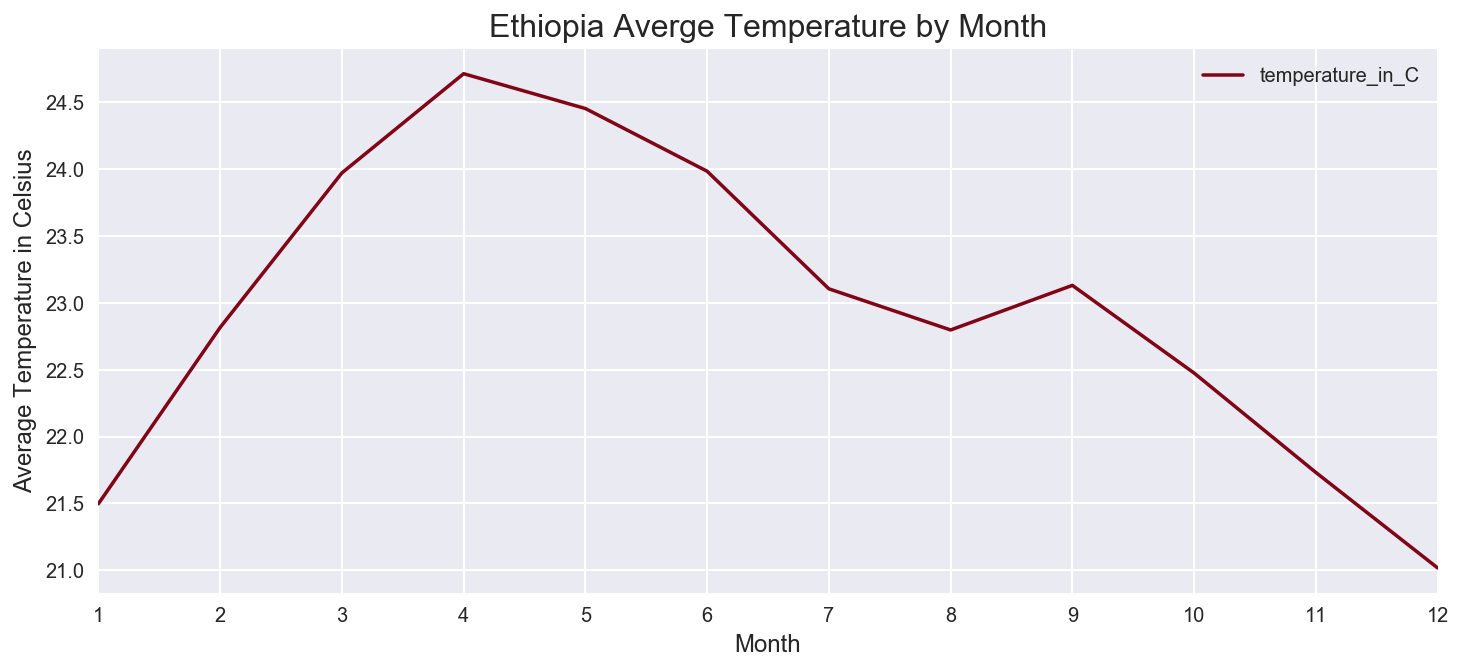

In [32]:
# Plot the average monthy temperature

avg_monthly_temp.plot( figsize = (12, 5), grid=True, color = '#800517', label = 'temperature in Celsius')
plt.title('Ethiopia Averge Temperature by Month', fontsize = 16)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Average Temperature in Celsius', fontsize = 12)
plt.xticks(np.arange(1,13,1))
plt.show()

#### Ethiopia seems to have mild temperature. The hottest months are in April & May. But usually under 27˚C (80ºF). This is because Ethiopia has mostly highland. 
#### The ideal temperature for Sorghum crop during growing season between 27˚C to 32˚C (80ºF to 89.6ºF). The temperature is a bit low for sorghum.  


In [33]:
# Combine the month and year together for timeseries to look at the rainfall through the years and months

temperature['yearmonth'] = temperature.apply(lambda x: datetime.strptime('{0} {1}'.format(x['year'], x['month']), '%Y %m'), axis=1)
temperature.index = rain['yearmonth']
temperature.head()

,temperature_in_C,year,month,country,yearmonth
yearmonth,,,,,
1991-01-01,21.8524,1991,1,ETH,1991-01-01
1991-02-01,22.3767,1991,2,ETH,1991-02-01
1991-03-01,23.5291,1991,3,ETH,1991-03-01
1991-04-01,24.7054,1991,4,ETH,1991-04-01
1991-05-01,23.9450,1991,5,ETH,1991-05-01


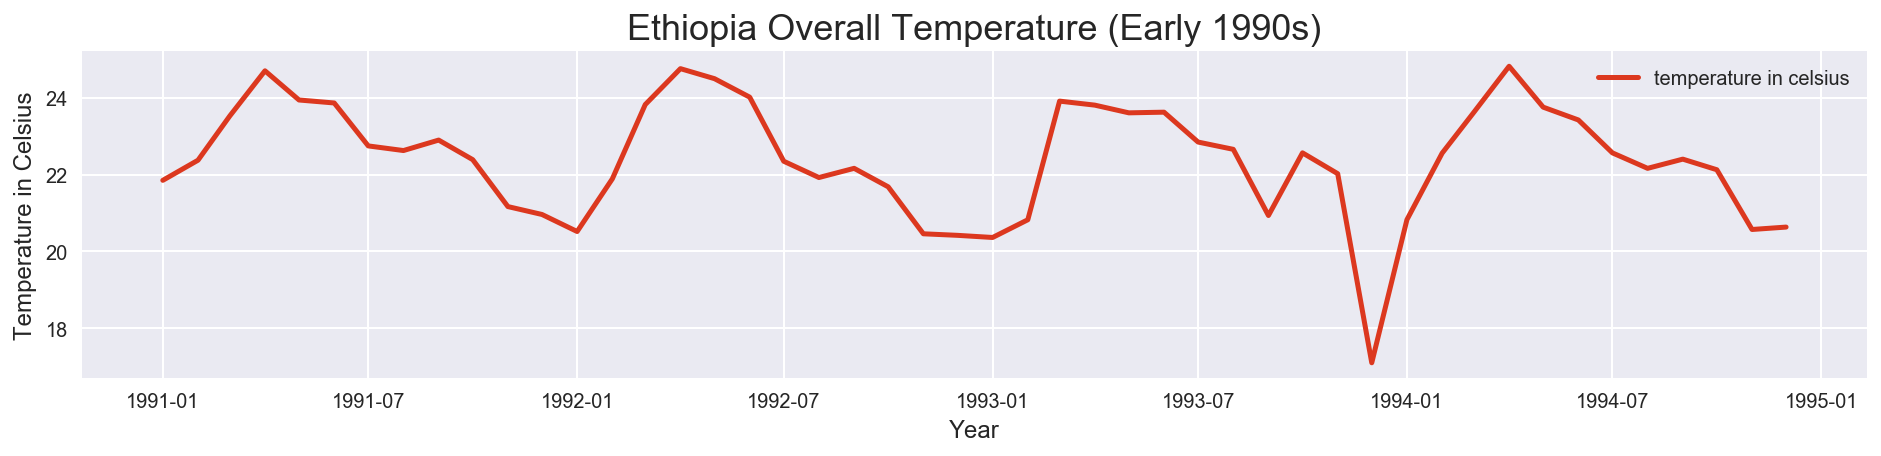

In [34]:
# look at how temperature fluctuated in the early 1990s

plt.figure(figsize = (16, 3))
plt.plot(temperature.temperature_in_C[0:48], lw = 2.5, color = '#DC381F', ls = '-', label = 'temperature in celsius')
plt.legend(loc ='best')
plt.title('Ethiopia Overall Temperature (Early 1990s)', fontsize = 18)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature in Celsius', fontsize = 12)
plt.show()

#### 1993 winter was cold. The temperature was probably too cold for sorghum growth. May be this is one of the reasons causing the 1994 Ethiopia famine?

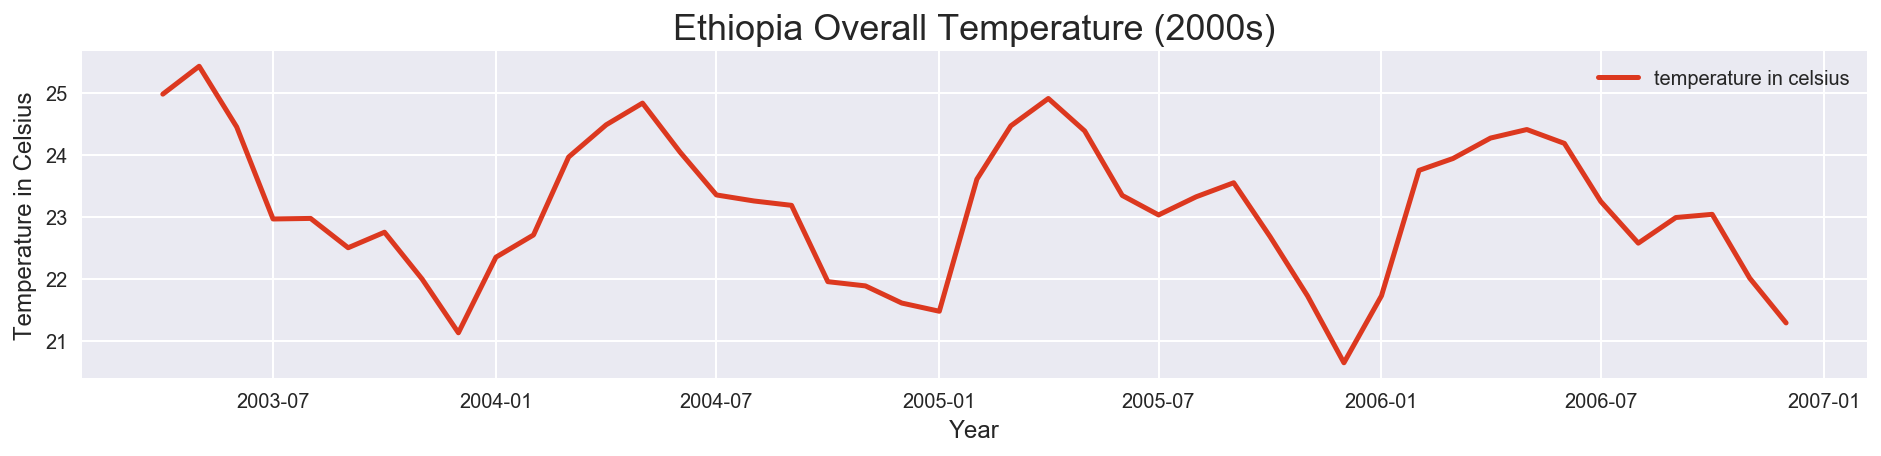

In [35]:
# look at how temperature fluctuated in the 2000s

plt.figure(figsize = (16, 3))
plt.plot(temperature.temperature_in_C[147:192], lw = 2.5, color = '#DC381F', ls = '-', label = 'temperature in celsius')
plt.legend(loc ='best')
plt.title('Ethiopia Overall Temperature (2000s)', fontsize = 18)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature in Celsius', fontsize = 12)
plt.show()

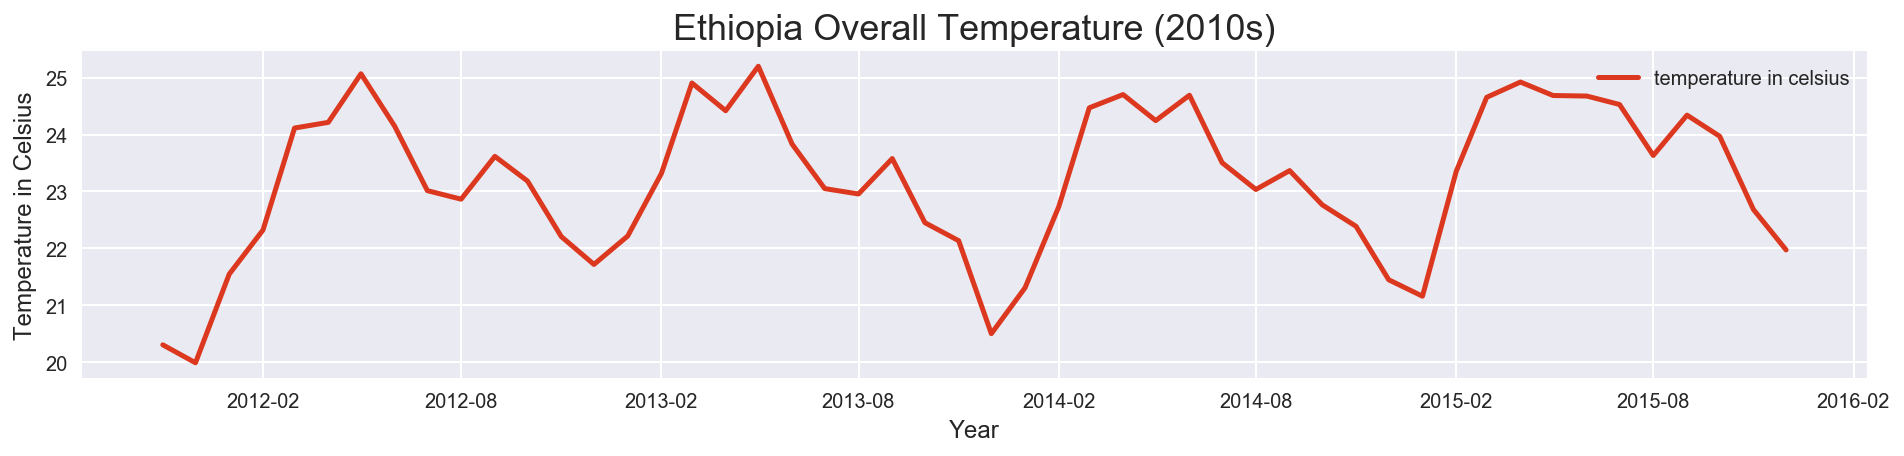

In [36]:
# look at how temperature fluctuated in the 2010s

plt.figure(figsize = (16, 3))
plt.plot(temperature.temperature_in_C[250:300], lw = 2.5, color = '#DC381F', ls = '-', label = 'temperature in celsius')
plt.legend(loc ='best')
plt.title('Ethiopia Overall Temperature (2010s)', fontsize = 18)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature in Celsius', fontsize = 12)
plt.show()

#### As we can tell by the temperature time series charts, annual temperatures do not fluctuate that much, only a few degree celsius. But 1993 winter was unusual cold compared to other winters.  This may be one of the factors contributed to the 1993 famine.

### e. Ethiopia Fertilizer Application Dataset.

How about the fertilizer usage?


In [37]:
fertilizer = pd.read_csv('datasets/FAOSTAT_data_6-28-2017 - Ethiopia_Fertilizer.csv')
fertilizer.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RF,Fertilizers,238,Ethiopia,5515,Production Quantity in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2002,2002,tonnes of nutrients,0,NR,Not reported by country
1,RF,Fertilizers,238,Ethiopia,5515,Production Quantity in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2003,2003,tonnes of nutrients,0,NR,Not reported by country
2,RF,Fertilizers,238,Ethiopia,5515,Production Quantity in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2004,2004,tonnes of nutrients,0,NR,Not reported by country
3,RF,Fertilizers,238,Ethiopia,5515,Production Quantity in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2005,2005,tonnes of nutrients,0,NR,Not reported by country
4,RF,Fertilizers,238,Ethiopia,5515,Production Quantity in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2006,2006,tonnes of nutrients,0,NR,Not reported by country


In [38]:
# What types of elements are in the fertilizer dataset?
fertilizer.groupby('Element').size()

Element
Consumption                         271
Consumption in nutrients             39
Export Quantity                     260
Export Quantity in nutrients         39
Import Quantity                     282
Import Quantity in nutrients         39
Non-fertilizer use                  282
Non-fertilizer use in nutrients      39
Production                          259
Production Quantity in nutrients     39
dtype: int64

In [39]:
# What are Flag Description?
fertilizer.groupby(['Flag Description']).size()

# Looks like these are the source indicators of fertilizer usage. A lot of information not available.

Flag Description
Data obtained as a balance                                                                 41
Not available                                                                            1269
Not reported by country                                                                   134
Official data from questionnaires and/or national sources and/or COMTRADE (reporters)     105
dtype: int64

In [40]:
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 14 columns):
Domain Code         1549 non-null object
Domain              1549 non-null object
Area Code           1549 non-null int64
Area                1549 non-null object
Element Code        1549 non-null int64
Element             1549 non-null object
Item Code           1549 non-null int64
Item                1549 non-null object
Year Code           1549 non-null int64
Year                1549 non-null int64
Unit                1549 non-null object
Value               1549 non-null int64
Flag                1549 non-null object
Flag Description    1549 non-null object
dtypes: int64(6), object(8)
memory usage: 169.5+ KB


In [41]:
fertilizer.Value.describe()

count      1549.000000
mean      11085.000000
std       48402.683182
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      560980.000000
Name: Value, dtype: float64

In [42]:
# Dataset has no null value, but there are many 0 values
fertilizer.Value.isnull().sum()

0

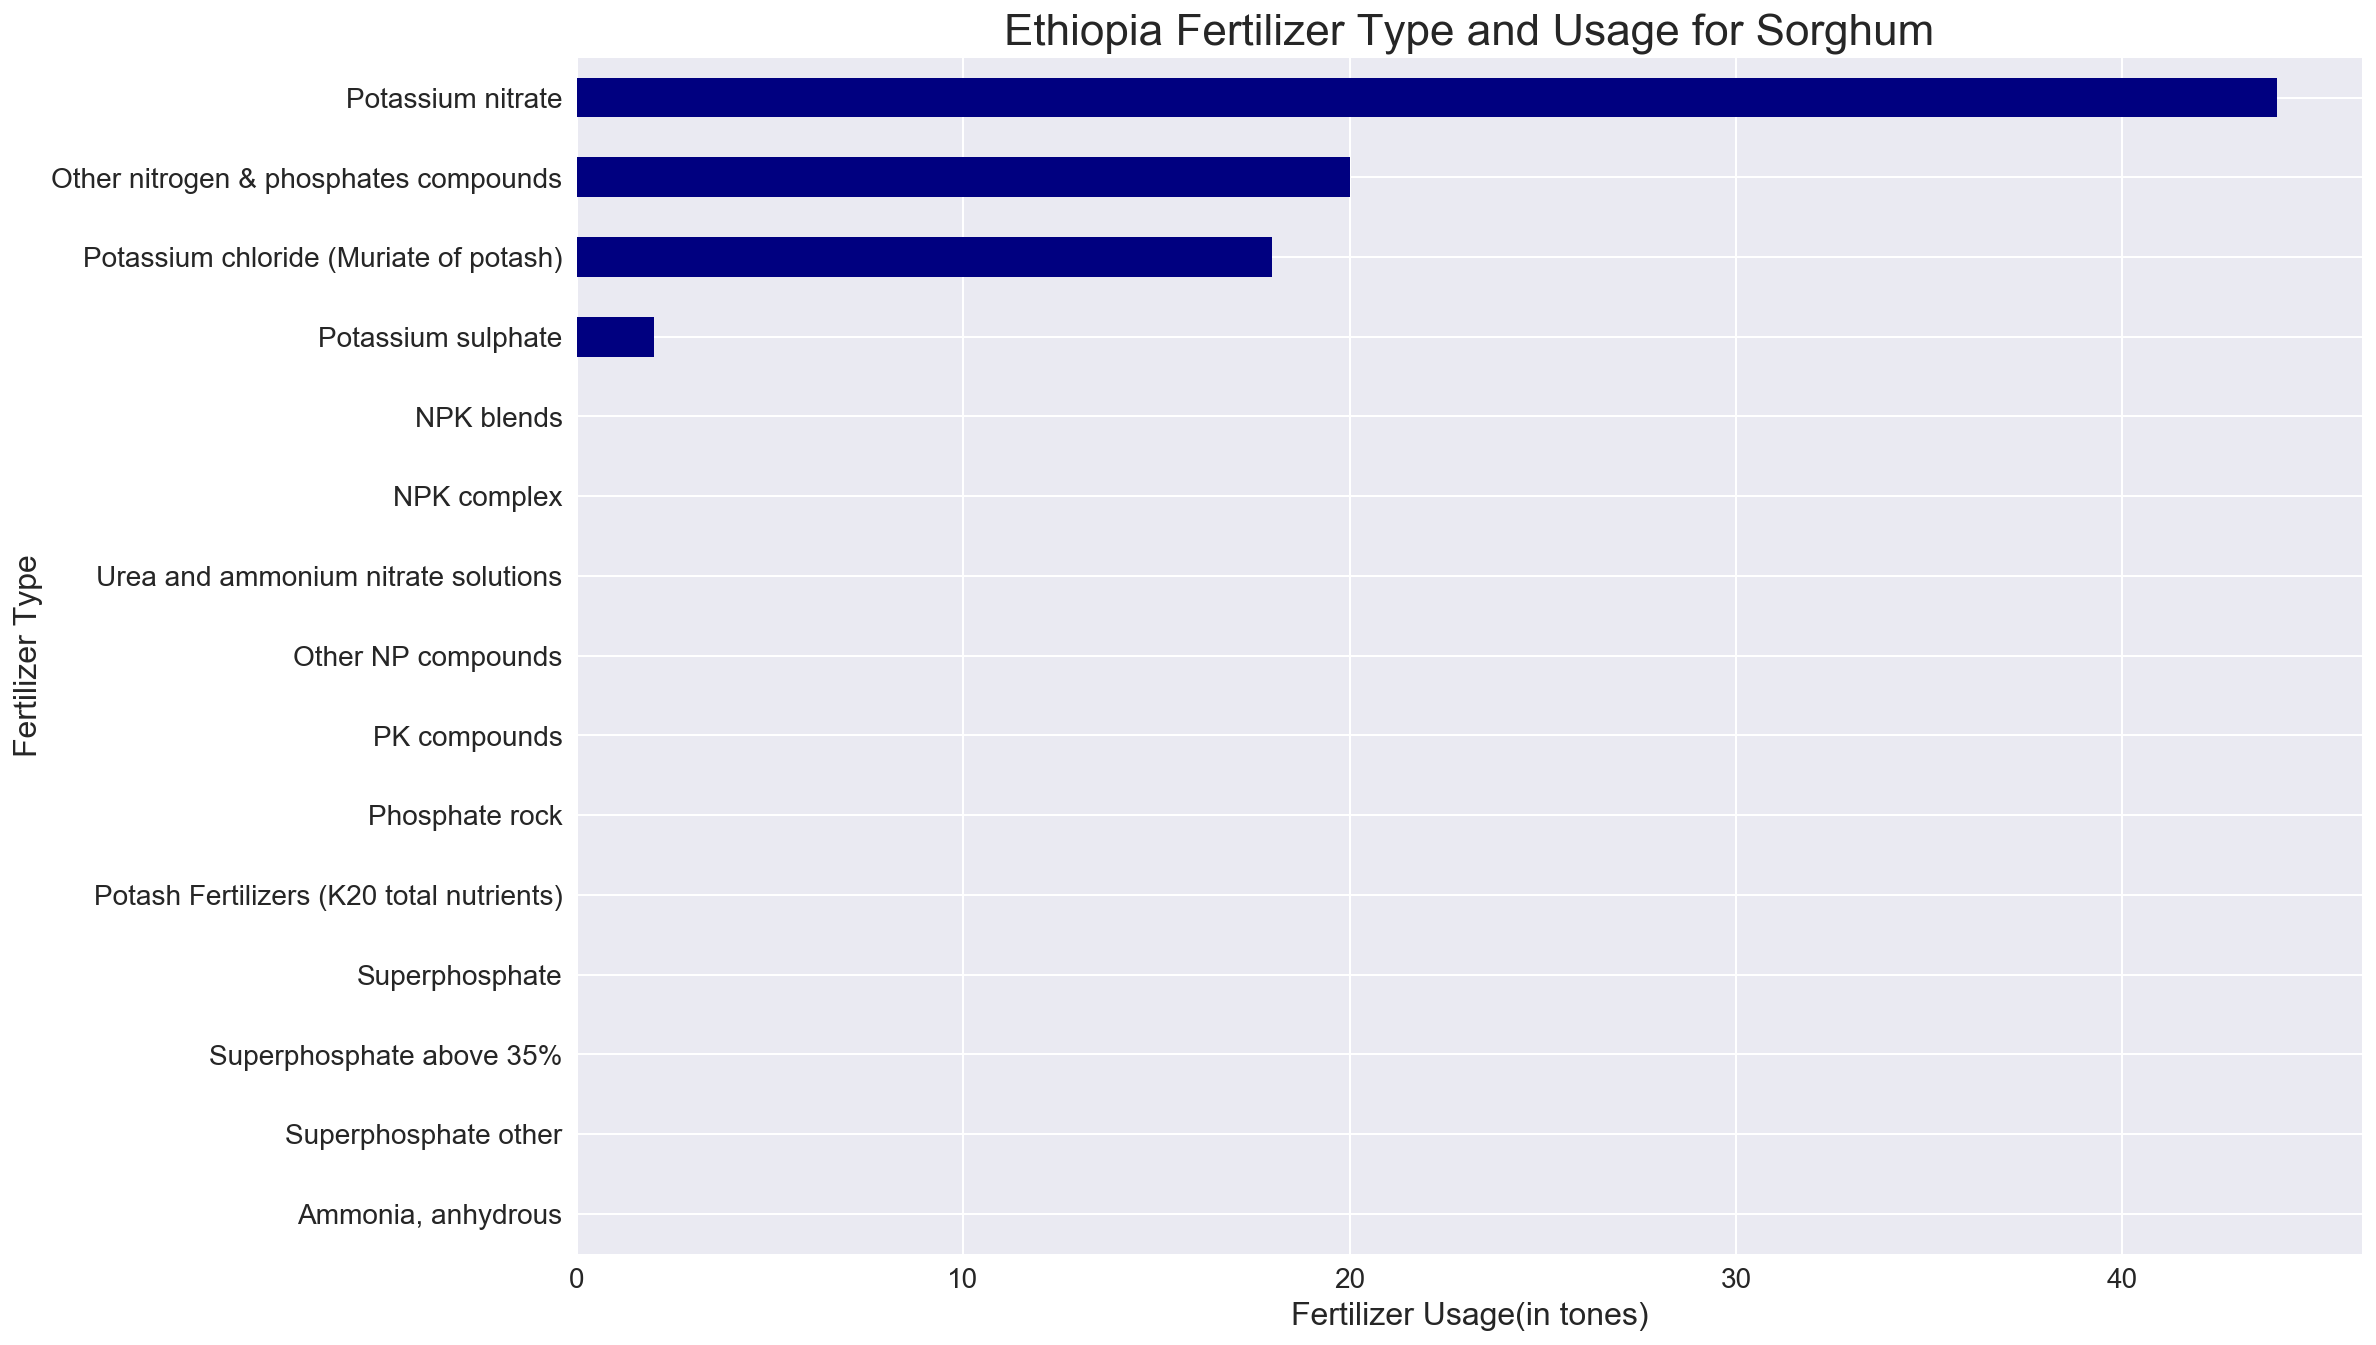

In [43]:
# plot the fertilizer usage dataset. 

fertilizer.groupby('Item')['Value'].sum().sort_values(ascending = True)[:15].plot(kind = 'barh',
                                                                                 figsize = (16, 11),
                                                                                 color = '#000080',
                                                                                 fontsize = 14)
plt.title('Ethiopia Fertilizer Type and Usage for Sorghum', fontsize = 22)
plt.xlabel('Fertilizer Usage(in tones)', fontsize = 16)
plt.ylabel('Fertilizer Type', fontsize= 16)
plt.show()

# This shows there are many fertilizer information not available.

#### From the Flag Description column, I have noticed that those mark 'not available' have zero value.
#### The zero value does not necessary mean there is no fertilizer applied.  It may indicate the data not available.

#### Further research from the fertilization dataset and the FAO Statistics explanation, there are three main plant  nutrients under the consumption nutrient flag description
* 1) Nitrogen Fertilizer (N)
* 2) Phosphate Fertilizer (P2O5)
* 3) Potash Fertilizer (K2O)

#### Because of these, I subset the fertilizer dataset contains only the consumption & the 3 main plant nutrients fertilizers. 

In [44]:
fertilizer[fertilizer.Element == 'Consumption in nutrients'].head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
52,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2002,2002,tonnes of nutrients,97647,Fb,Data obtained as a balance
53,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2003,2003,tonnes of nutrients,34075,Fb,Data obtained as a balance
54,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2004,2004,tonnes of nutrients,81860,Qm,Official data from questionnaires and/or natio...
55,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2005,2005,tonnes of nutrients,80503,Qm,Official data from questionnaires and/or natio...
56,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2006,2006,tonnes of nutrients,84628,Qm,Official data from questionnaires and/or natio...


#### The Potash Fertilizers all have zero values. According to the FAO Fertilizer handbook, I may be able to impute the Potash Fertilizer agriculture consumption based on the Postassic production. 
http://fenixservices.fao.org/faostat/static/documents/RF/RF_e.pdf

#### Check the Item on the dataset to find out the potassium related items

In [45]:
fertilizer.groupby('Item').size()

Item
Ammonia, anhydrous                              22
Ammonium nitrate                                65
Ammonium sulphate                               65
Calcium ammonium nitrate                        65
Diammonium phosphate (DAP)                      65
Monoammonium phosphate (MAP)                    65
NPK blends                                      11
NPK complex                                     65
NPK complex <=10kg                              64
NPK complex >10kg                               65
Nitrogen Fertilizers (N total nutrients)        65
Other NP compounds                              65
Other nitrogen & phosphates compounds           65
Other nitrogen & phosphorus compounds           65
PK compounds                                    65
Phosphate Fertilizers (P205 total nutrients)    65
Phosphate rock                                  22
Potash Fertilizers (K20 total nutrients)        65
Potassium chloride (Muriate of potash)          65
Potassium nitrate         

In [46]:

fertilizer[fertilizer.Item.isin(['Potassium chloride (Muriate of potash)', 'Potassium sulphate', 'Potassium nitrate'])].groupby('Item')[['Value']].sum()

# No luck, there is not much information either. I assume there is not a significant amount of
# potash fertilizer being used in Ethiopia. We will just use the Nitrogen and Phosphate variables. 

,Value
Item,
Potassium chloride (Muriate of potash),18
Potassium nitrate,44
Potassium sulphate,2


In [47]:
plant_fertilizer = fertilizer[(fertilizer.Element == 'Consumption in nutrients') & (fertilizer.Item !='Potash Fertilizers (K20 total nutrients)')]
plant_fertilizer.Item.unique()
plant_fertilizer.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
52,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2002,2002,tonnes of nutrients,97647,Fb,Data obtained as a balance
53,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2003,2003,tonnes of nutrients,34075,Fb,Data obtained as a balance
54,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2004,2004,tonnes of nutrients,81860,Qm,Official data from questionnaires and/or natio...
55,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2005,2005,tonnes of nutrients,80503,Qm,Official data from questionnaires and/or natio...
56,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2006,2006,tonnes of nutrients,84628,Qm,Official data from questionnaires and/or natio...


In [48]:
# Save this to a .csv file

plant_fertilizer.to_csv('plant_fertilizer.csv', index = False)

In [49]:
fert_usage = pd.read_csv('plant_fertilizer.csv')
fert_usage.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2002,2002,tonnes of nutrients,97647,Fb,Data obtained as a balance
1,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2003,2003,tonnes of nutrients,34075,Fb,Data obtained as a balance
2,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2004,2004,tonnes of nutrients,81860,Qm,Official data from questionnaires and/or natio...
3,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2005,2005,tonnes of nutrients,80503,Qm,Official data from questionnaires and/or natio...
4,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2006,2006,tonnes of nutrients,84628,Qm,Official data from questionnaires and/or natio...


In [50]:
# Most of the information on the fertilizer dataset for explanation only. I can simplify the dataset by removing
# these columns

fert_usage.drop(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element', 'Element Code', 'Item Code', 'Year Code', 'Unit', 'Flag', 'Flag Description'], axis = 1, inplace = True)



In [51]:
# rename columns & set year in index

fert_usage.columns = ['item', 'year', 'fertilizer_value']
fert_usage.index = fert_usage['year']
fert_usage.head()

,item,year,fertilizer_value
year,,,
2002,Nitrogen Fertilizers (N total nutrients),2002,97647
2003,Nitrogen Fertilizers (N total nutrients),2003,34075
2004,Nitrogen Fertilizers (N total nutrients),2004,81860
2005,Nitrogen Fertilizers (N total nutrients),2005,80503
2006,Nitrogen Fertilizers (N total nutrients),2006,84628


In [52]:
fert_usage.groupby('item').size()

item
Nitrogen Fertilizers (N total nutrients)        13
Phosphate Fertilizers (P205 total nutrients)    13
dtype: int64

In [53]:
# simplify item names

fert_usage['item'] = fert_usage.item.map(lambda x: 'nitrogen' if x == 'Nitrogen Fertilizers (N total nutrients)'
                                        else 'phosphate')
fert_usage.head(3)


,item,year,fertilizer_value
year,,,
2002,nitrogen,2002,97647
2003,nitrogen,2003,34075
2004,nitrogen,2004,81860


In [54]:
# Save file for further use
fert_usage.to_csv('fert_usage.csv', index = False)

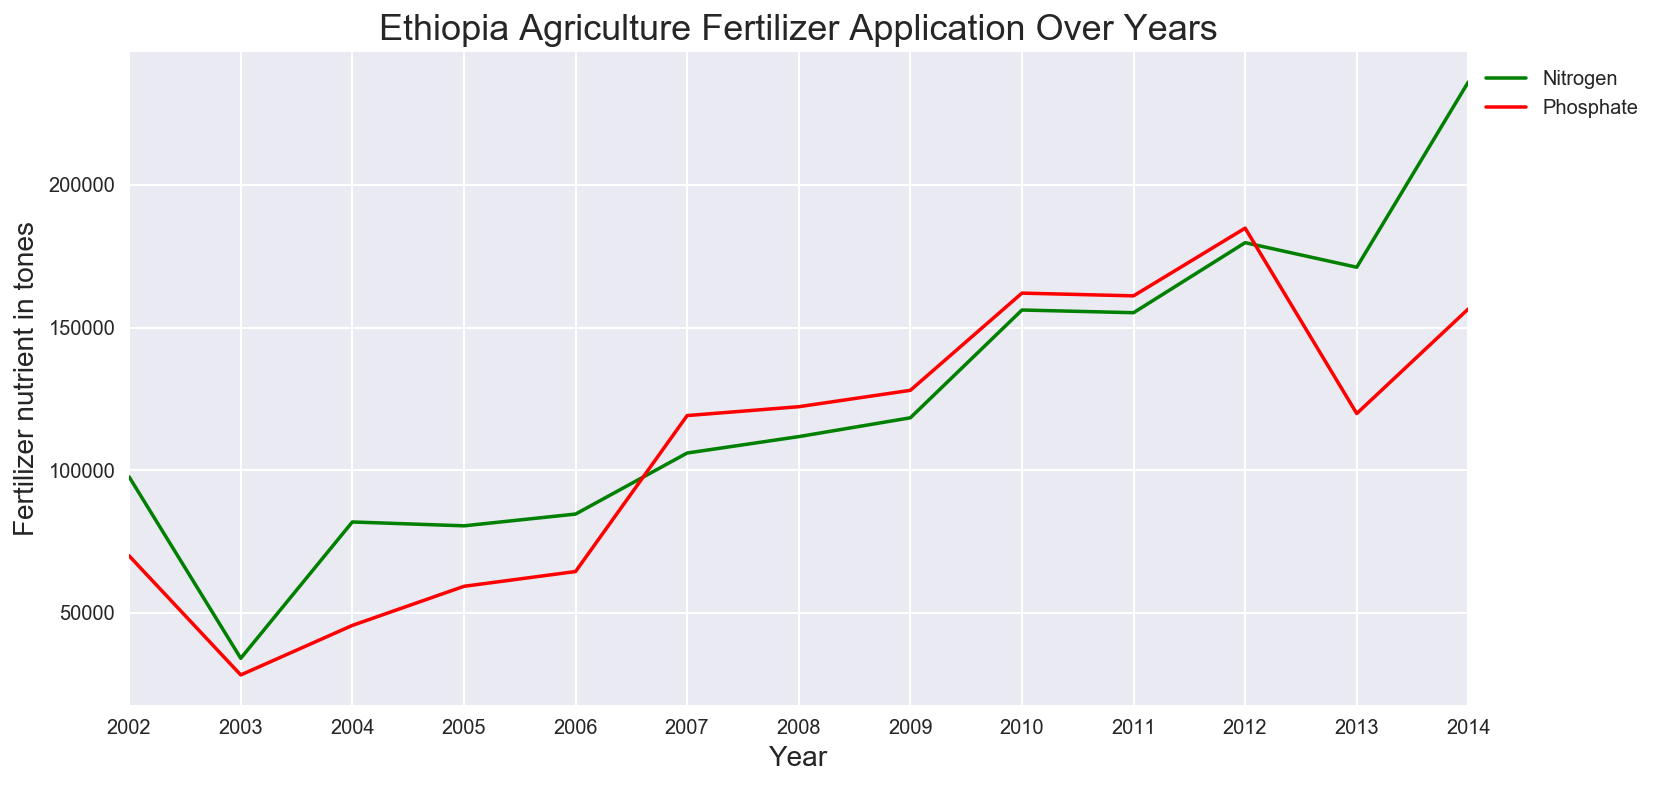

In [55]:
# Check the Nitgrogen and Phosphate fertilizer application over the years

fert_usage[fert_usage.item=='nitrogen'].fertilizer_value.plot(figsize = (12,6),  label= 'Nitrogen', color = 'green')
fert_usage[fert_usage.item=='phosphate'].fertilizer_value.plot(label = 'Phosphate', color = 'red')
plt.title('Ethiopia Agriculture Fertilizer Application Over Years', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Fertilizer nutrient in tones', fontsize = 14)
plt.xticks(np.arange(2002, 2015, 1))
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

#### Fertilizer application for both Nitrogen and Phosphate also increased over the years. 

### f. Ethiopia Historical Pesticide Dataset

How about pesticide?

In [56]:
pesticide = pd.read_csv('datasets/FAOSTAT_data_7-7-2017-Ethiopia_Pesticide.csv')
pesticide.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RP,Pesticides Use,238,Ethiopia,5161,Use,1357,Pesticides,1995,1995,tonnes of active ingredients,242.0,A,"Aggregate, may include official, semi-official..."
1,RP,Pesticides Use,238,Ethiopia,5161,Use,1357,Pesticides,1996,1996,tonnes of active ingredients,383.0,A,"Aggregate, may include official, semi-official..."
2,RP,Pesticides Use,238,Ethiopia,5161,Use,1357,Pesticides,1998,1998,tonnes of active ingredients,383.0,A,"Aggregate, may include official, semi-official..."
3,RP,Pesticides Use,238,Ethiopia,5161,Use,1357,Pesticides,2000,2000,tonnes of active ingredients,602.0,A,"Aggregate, may include official, semi-official..."
4,RP,Pesticides Use,238,Ethiopia,5161,Use,1357,Pesticides,2001,2001,tonnes of active ingredients,630.0,A,"Aggregate, may include official, semi-official..."


In [57]:
# Check how many unique elements, items, and flag descriptions in the pesticide dataset
print pesticide.groupby(['Element', 'Item', 'Flag Description']).size()

Element  Item                      Flag Description                                                                             
Use      Amides                    Official data reported on FAO Questionnaires from countries                                       3
         Anticoagulants            Official data reported on FAO Questionnaires from countries                                       2
         Benzimidazoles            Official data reported on FAO Questionnaires from countries                                       2
         Bipiridils                Official data reported on FAO Questionnaires from countries                                       1
         Carbamates Insecticides   Official data reported on FAO Questionnaires from countries                                       4
         Chlorinated Hydrocarbons  Official data reported on FAO Questionnaires from countries                                       5
         Diazines, Morpholines     Official data reported on 

Most of the data collected by FAO using questionnaires.

#### In addition to pesticide, the pesticide dataset contains herbicides. This is especially important because Striga infestation is very serious in Ethiopia. Striga is a purple flower weeds that sucks nutrient from major crops and very hard to control.

<img src = 'https://striga.aatf-africa.org/files/Striga4_jpg_0.jpg', width = '30%'>

In [58]:
# Look at statistics of each item in the pesticide dataset.

pesticide.groupby('Item')[['Value']].describe()

Value                                           \
                         count         mean          std    min     25%   
Item                                                                      
Amides                     3.0     9.666667     5.033223    5.0    7.00   
Anticoagulants             2.0     0.500000     0.707107    0.0    0.25   
Benzimidazoles             2.0     2.000000     2.828427    0.0    1.00   
Bipiridils                 1.0     0.000000          NaN    0.0    0.00   
Carbamates Insecticides    4.0    22.500000    26.987651    1.0    1.75   
Chlorinated Hydrocarbons   5.0    27.800000    21.147104    7.0   13.00   
Diazines, Morpholines      1.0     1.000000          NaN    1.0    1.00   
Dinitroanilines            3.0     4.000000     1.000000    3.0    3.50   
Dithiocarbamates           4.0    10.500000     5.000000    3.0   10.50   
Fungicides&Bactericides   11.0   133.627273   112.813289    4.0   25.50   
Herbicides                11.0  1275.390909  1111.347516  100.0  325.50   
Inorganics                 2.0    10.000000     4.242641    7.0    8.50   
Insecticides              11.0   305.572727   249.378945   38.0  108.50   
Organo-Phosphates          5.0    32.800000    27.598913    2.0   20.00   
Other Fungicides           5.0    28.200000    63.057117    0.0    0.00   
Other Herbicides           5.0    18.400000     9.838699    2.0   18.00   
Other Insecticides         3.0    41.333333    45.081408    3.0   16.50   
Other Rodenticides         1.0     7.000000          NaN    7.0    7.00   
Pesticides                11.0  1721.418182  1409.343173  242.0  492.50   
Phenoxy Hormone Products   5.0   241.800000   193.202484   34.0  108.00   
Plant Growth Regulators   10.0     0.800000     0.498888    0.0    0.60   
Pyrethroids                5.0    11.200000     6.978539    2.0    7.00   
Rodenticides               6.0     6.333333     6.121002    0.0    2.00   
Seed Treatm Fungicides     3.0    11.033333     8.412689    2.9    6.70   
Sulfonyl Ureas             1.0     1.000000          NaN    1.0    1.00   
Triazines                  5.0    20.400000    15.404545    3.0    5.00   
Triazoles, Diazoles        3.0     1.000000     1.000000    0.0    0.50   
Urea derivates             1.0     1.000000          NaN    1.0    1.00   

                                                   
                             50%      75%     max  
Item                                               
Amides                       9.0    12.00    15.0  
Anticoagulants               0.5     0.75     1.0  
Benzimidazoles               2.0     3.00     4.0  
Bipiridils                   0.0     0.00     0.0  
Carbamates Insecticides     15.5    36.25    58.0  
Chlorinated Hydrocarbons    25.0    33.00    61.0  
Diazines, Morpholines        1.0     1.00     1.0  
Dinitroanilines              4.0     4.50     5.0  
Dithiocarbamates            13.0    13.00    13.0  
Fungicides&Bactericides    143.8   184.45   377.1  
Herbicides                1197.6  1767.40  3109.7  
Inorganics                  10.0    11.50    13.0  
Insecticides               165.0   533.35   666.4  
Organo-Phosphates           22.0    47.00    73.0  
Other Fungicides             0.0     0.00   141.0  
Other Herbicides            22.0    22.00    28.0  
Other Insecticides          30.0    60.50    91.0  
Other Rodenticides           7.0     7.00     7.0  
Pesticides                1400.7  2598.50  4128.1  
Phenoxy Hormone Products   183.0   394.00   490.0  
Plant Growth Regulators      1.0     1.00     1.4  
Pyrethroids                 12.0    15.00    20.0  
Rodenticides                 6.0     7.75    17.0  
Seed Treatm Fungicides      10.5    15.10    19.7  
Sulfonyl Ureas               1.0     1.00     1.0  
Triazines                   26.0    32.00    36.0  
Triazoles, Diazoles          1.0     1.50     2.0  
Urea derivates               1.0     1.00     1.0

In [59]:
# Make a copy of the original dataset to work on 
pesticide_usage = pesticide.copy()

In [60]:
# Simplify the pesticide dataset.

pesticide_usage.drop(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element','Element Code', 'Item Code', 'Year Code','Unit', 'Flag','Flag Description'], axis = 1, inplace = True)
pesticide_usage.head()

,Item,Year,Value
0,Pesticides,1995,242.0
1,Pesticides,1996,383.0
2,Pesticides,1998,383.0
3,Pesticides,2000,602.0
4,Pesticides,2001,630.0


In [61]:
pesticide_usage.columns = ['item', 'year', 'pesticide_value']
pesticide_usage.index = pesticide_usage['year']
pesticide_usage.head()

,item,year,pesticide_value
year,,,
1995,Pesticides,1995,242.0
1996,Pesticides,1996,383.0
1998,Pesticides,1998,383.0
2000,Pesticides,2000,602.0
2001,Pesticides,2001,630.0


In [62]:
# Save the simplified pesticide datatset 
pesticide_usage.to_csv('pesticide_usage.csv', index = False)

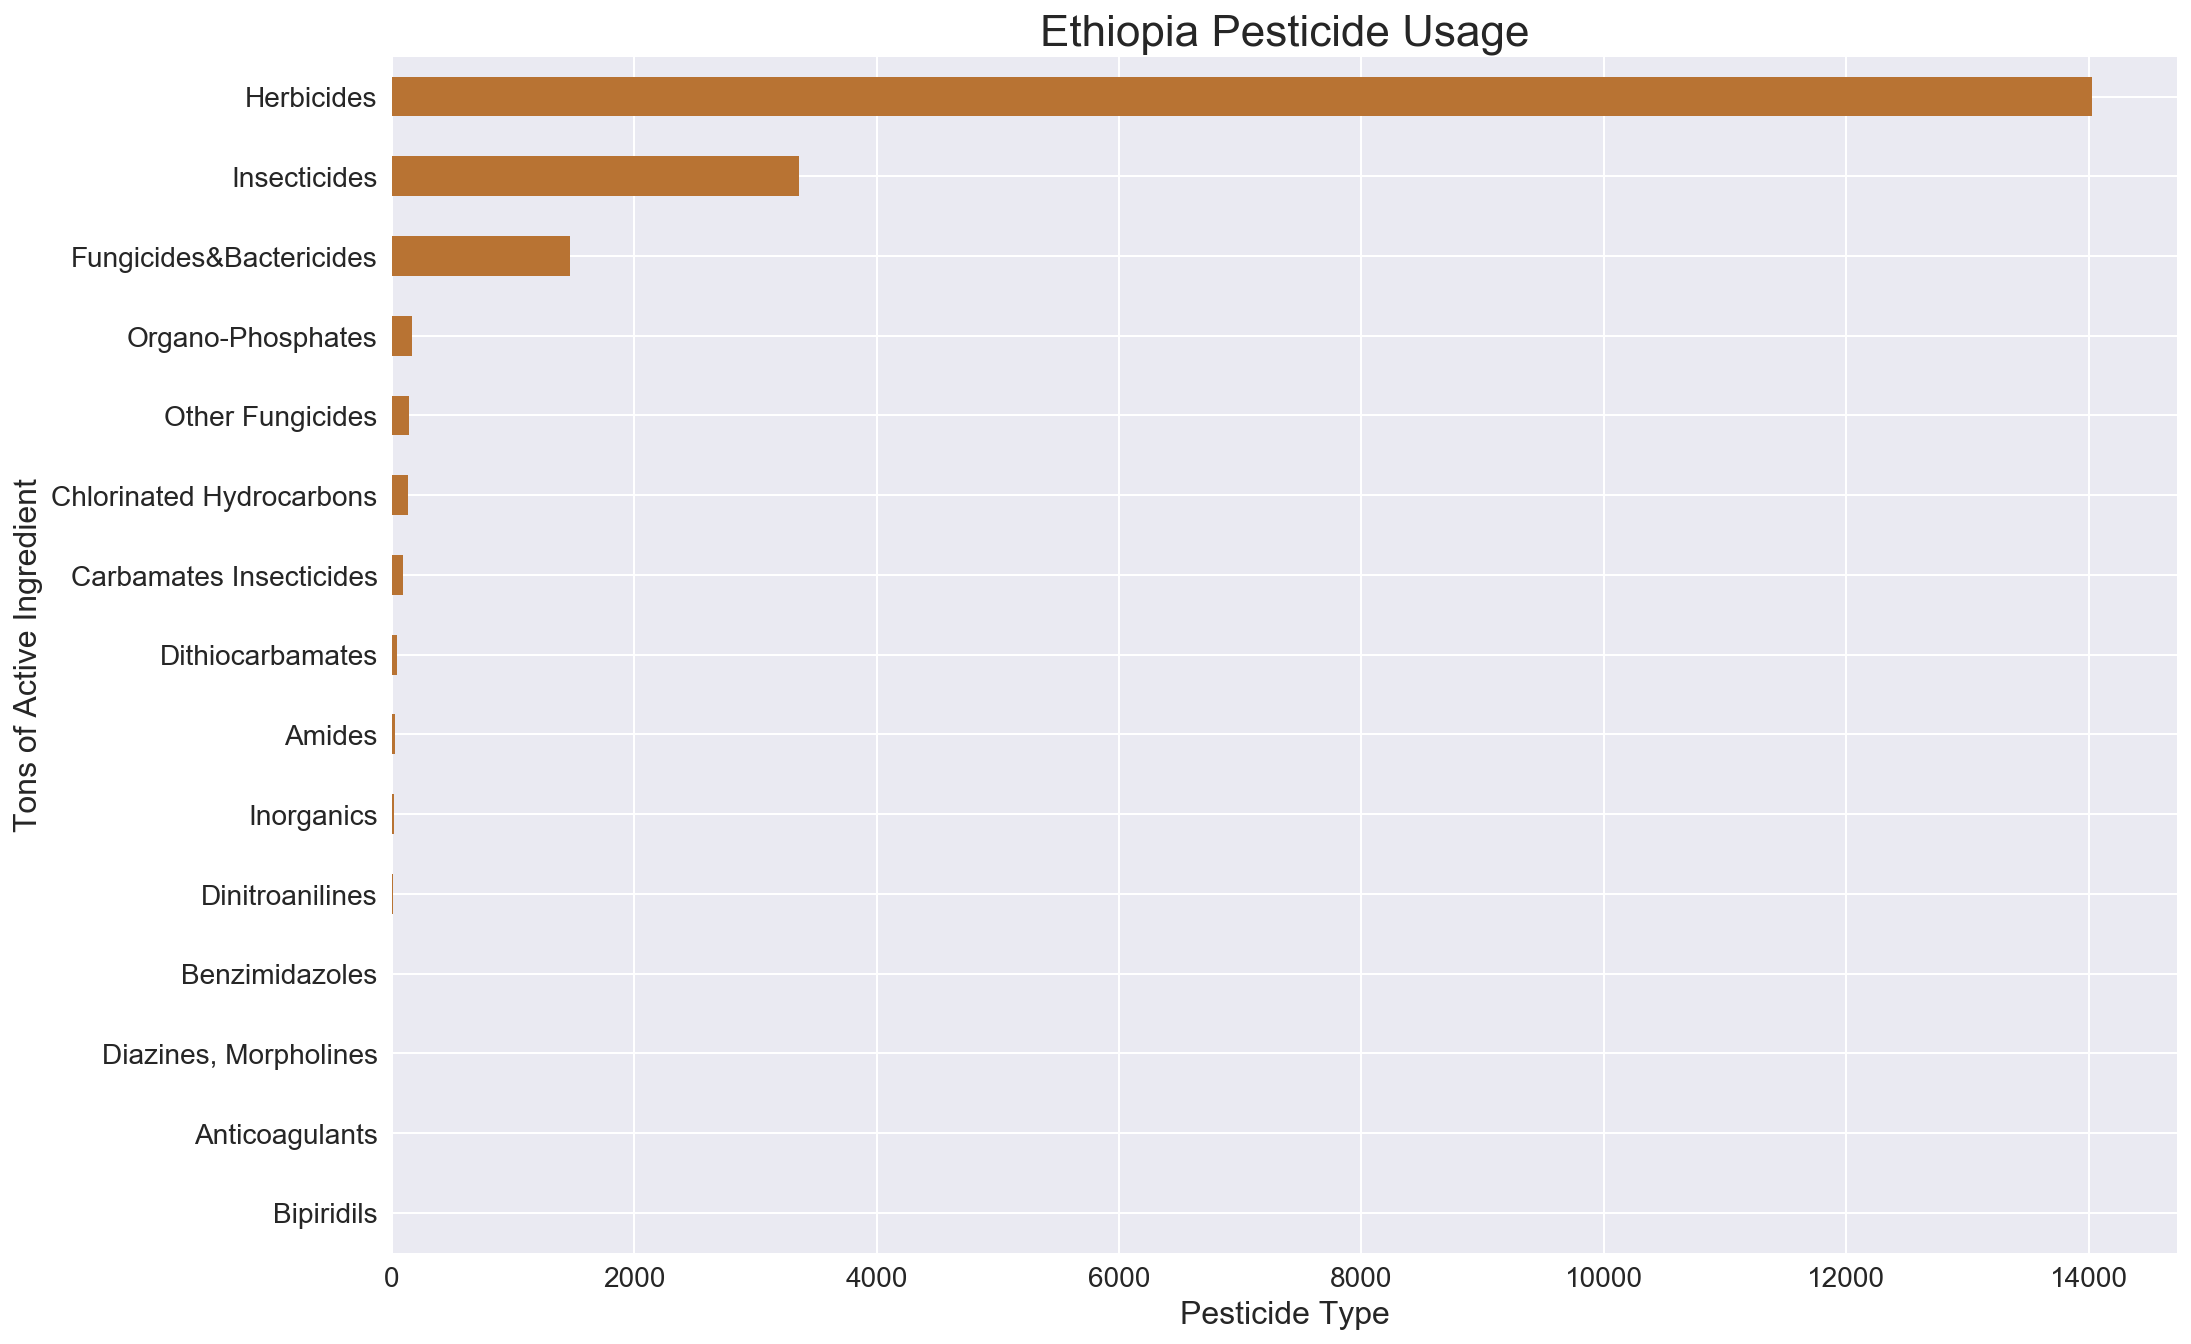

In [63]:
# Plot the dataset

pesticide_usage.groupby('item')['pesticide_value'].sum()[:15].sort_values(ascending =True).plot(kind = 'barh', 
                                                                                   figsize = (16, 11), 
                                                                                   color = '#B87333', 
                                                                                 fontsize = 14)
                                                                                  
plt.title('Ethiopia Pesticide Usage', fontsize = 22)
plt.xlabel('Pesticide Type', fontsize = 16)
plt.ylabel('Tons of Active Ingredient', fontsize = 16)
plt.show()


#### Ethiopia applied Pesticides, Herbicides, Insecticides, Fungicides&Bactericides, and Phenoxy Hormone Products the most. 

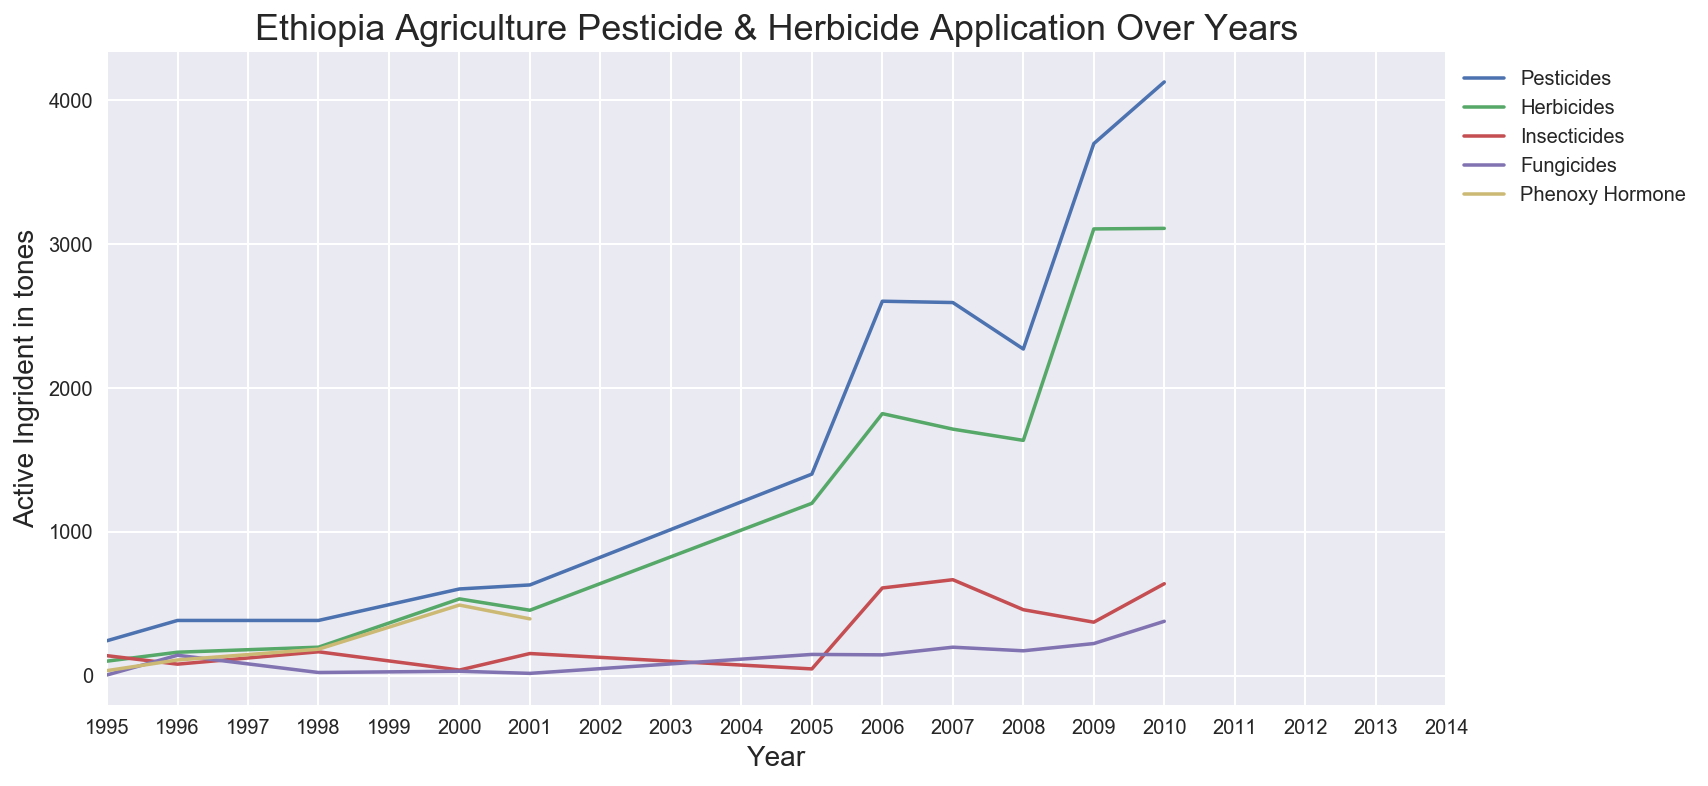

In [64]:
# Look at the 4 major pesticides and herbicides

pesticide_usage[pesticide_usage.item=='Pesticides'].pesticide_value.plot(figsize = (12,6), label = 'Pesticides')
pesticide_usage[pesticide_usage.item=='Herbicides'].pesticide_value.plot(figsize = (12,6), label = 'Herbicides')
pesticide_usage[pesticide_usage.item=='Insecticides'].pesticide_value.plot(figsize = (12,6), label = 'Insecticides')
pesticide_usage[pesticide_usage.item=='Fungicides&Bactericides'].pesticide_value.plot(figsize = (12,6), label ='Fungicides')
pesticide_usage[pesticide_usage.item=='Phenoxy Hormone Products'].pesticide_value.plot(figsize = (12,6), label ='Phenoxy Hormone')
plt.title('Ethiopia Agriculture Pesticide & Herbicide Application Over Years', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Active Ingrident in tones', fontsize = 14)
plt.xticks(np.arange(1995, 2015, 1))
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

#### Interesting, Ethiopia stopped using the Phenoxy Hormone Products in year 2001. It turns out  Ethiopia used Phenoxy Hormone to curb the invasive weed Striga. But the herbicide has been banned by many countries after it is found causing serious contamination. 

### Now that I have a sense of the historical sorghum production and the historical variables that input into the plant growth. It is time to combine the crop yields and variables together for next phase, feature selections.

---

## 2. Feature Selection

In [65]:
# Take a look at the datasets again to determine how to merge or transform some datasets into tidy data.

crop_yield.head(3)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Unit,Value,Flag,Flag Description
Year,,,,,,,,,,,,,
1993,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1993,hg/ha,14018,Fc,Calculated data
1994,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1994,hg/ha,9319,Fc,Calculated data
1995,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1995,hg/ha,12401,Fc,Calculated data


In [66]:
# Since we only need the year and the value, we can simplify the crop yield dataset
sorghum_yield = crop_yield.copy()
sorghum_yield.drop(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element', 'Item Code', 'Year Code', 'Unit', 'Flag', 'Flag Description'], axis = 1, inplace = True)
sorghum_yield.to_csv('sorghum_yield.csv')


In [67]:
# Save simplified sorghum yield production dataset to csv file and rename columns for dataset merge
sorghum_yield = pd.read_csv('sorghum_yield.csv')
sorghum_yield.columns = ['year', 'crop', 'crop_yield']
sorghum_yield.head(3)

,year,crop,crop_yield
0,1993,Sorghum,14018
1,1994,Sorghum,9319
2,1995,Sorghum,12401


In [68]:
rain.head(3)

,rain_in_mm,year,month,country,yearmonth
yearmonth,,,,,
1991-01-01,13.0865,1991,1,ETH,1991-01-01
1991-02-01,21.1366,1991,2,ETH,1991-02-01
1991-03-01,65.6054,1991,3,ETH,1991-03-01


In [69]:
# Since the rain dataset has value by year and month, I need to transform it to the seasonal rain as features
# I decide to use SQL 
# import sqlite3

from pandas.io import sql
import sqlite3

# establish sql connection
rain_con = sqlite3.connect('datasets/rain.db.sqlite')

# create a rain DB
rain.to_sql(name = 'rain', con = rain_con, if_exists = 'replace', index = False)

# set up a function to query the rain DB
def rainQ(query, db = rain_con):
    return sql.read_sql(query, db)


In [70]:
# query rain DB, map season, and total each season's rain. 
rain_season = rainQ('''SELECT DISTINCT
year, 
CASE WHEN month in (11, 12, 1) THEN 'winter_rain'
WHEN month in (2, 3, 4) THEN 'spring_rain'
WHEN month in (5, 6, 7) THEN 'summer_rain'
WHEN month in (8, 9, 10) THEN 'autumn_rain'
ELSE NULL END AS 'season',
SUM(rain_in_mm) AS 'rain_in_mm'
FROM rain
GROUP BY year, season;

''')

# Save the report to csv file for later use
rain_season.to_csv('datasets/rain_season.csv', index = False)

In [71]:
rain_season = pd.read_csv('datasets/rain_season.csv')
rain_season.head()

,year,season,rain_in_mm
0,1991,autumn_rain,265.5136
1,1991,spring_rain,162.0200
2,1991,summer_rain,296.0953
3,1991,winter_rain,41.8835
4,1992,autumn_rain,317.4793


In [72]:
# pivot the rain_season dataset so that the seasonal rain become the features for modeling. 
rain_season = rain_season.pivot_table(values = 'rain_in_mm', 
                       index = 'year',
                       columns = ['season'], aggfunc = np.sum ).reset_index()
rain_season.head()

season,year,autumn_rain,spring_rain,summer_rain,winter_rain
0,1991,265.5136,162.02000,296.0953,41.88350
1,1992,317.4793,101.55940,229.4034,83.85610
2,1993,286.9427,161.05940,305.1333,38.73372
3,1994,327.3255,97.43062,333.5200,58.86019
4,1995,264.0658,155.20360,253.6664,38.63439


In [73]:
temperature.head(3)

,temperature_in_C,year,month,country,yearmonth
yearmonth,,,,,
1991-01-01,21.8524,1991,1,ETH,1991-01-01
1991-02-01,22.3767,1991,2,ETH,1991-02-01
1991-03-01,23.5291,1991,3,ETH,1991-03-01


In [74]:
# Perform the same on the temperature dataset

temp_con = sqlite3.connect('datasets/temperature.db.sqlite')
temperature.to_sql(name = 'temperature', con = temp_con, if_exists = 'replace', index = False)

def tempQ(query, db = temp_con):
    return sql.read_sql(query, db)


In [75]:
temp_season = tempQ('''SELECT DISTINCT
year, 
CASE WHEN month in (11, 12, 1) THEN 'winter_temp'
WHEN month in (2, 3, 4) THEN 'spring_temp'
WHEN month in (5, 6, 7) THEN 'summer_temp'
WHEN month in (8, 9, 10) THEN 'autumn_temp'
ELSE NULL END AS 'season',
AVG(temperature_in_C) AS 'temperature_in_C'
FROM temperature
GROUP BY year, season;

''')
temp_season.to_csv('datasets/temp_season.csv', index = False)


In [76]:
temp_season = pd.read_csv('datasets/temp_season.csv')
temp_season.head()

,year,season,temperature_in_C
0,1991,autumn_temp,22.640033
1,1991,spring_temp,23.537067
2,1991,summer_temp,23.520500
3,1991,winter_temp,21.327933
4,1992,autumn_temp,21.924533


In [77]:
temp_season = temp_season.pivot_table(values = 'temperature_in_C', 
                       index = 'year',
                       columns = ['season'], aggfunc = np.mean ).reset_index()
temp_season.head()

season,year,autumn_temp,spring_temp,summer_temp,winter_temp
0,1991,22.640033,23.537067,23.520500,21.327933
1,1992,21.924533,23.493033,23.623267,20.466000
2,1993,22.054867,22.850833,23.362667,19.829567
3,1994,22.232500,23.670200,23.250667,20.677833
4,1995,23.002600,23.633533,23.748933,21.602633


In [78]:
fert_usage.head()

,item,year,fertilizer_value
year,,,
2002,nitrogen,2002,97647
2003,nitrogen,2003,34075
2004,nitrogen,2004,81860
2005,nitrogen,2005,80503
2006,nitrogen,2006,84628


In [79]:
fert_usage = fert_usage.pivot_table(values = 'fertilizer_value',
                      index = 'year',
                      columns = ['item'], aggfunc = np.sum).reset_index()
fert_usage.head(3)

item,year,nitrogen,phosphate
0,2002,97647,69977
1,2003,34075,28240
2,2004,81860,45604


In [80]:
pesticide_usage.head(3)

,item,year,pesticide_value
year,,,
1995,Pesticides,1995,242.0
1996,Pesticides,1996,383.0
1998,Pesticides,1998,383.0


In [81]:
pesticide_usage = pesticide_usage.pivot_table(values = 'pesticide_value',
                                            index = 'year',
                                            columns = ['item'], aggfunc = np.sum).reset_index()


In [82]:
fert_usage.year.unique()

# the historical fertilizer from 2002 to 2014. 
# I have attempted to find fertilizer application information in Ethiopia prior to 2002,
# but I could not locate any. 

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014])

In [83]:
pesticide_usage.head()

item,year,Amides,Anticoagulants,Benzimidazoles,Bipiridils,Carbamates Insecticides,Chlorinated Hydrocarbons,"Diazines, Morpholines",Dinitroanilines,Dithiocarbamates,...,Pesticides,Phenoxy Hormone Products,Plant Growth Regulators,Pyrethroids,Rodenticides,Seed Treatm Fungicides,Sulfonyl Ureas,Triazines,"Triazoles, Diazoles",Urea derivates
0,1995,NaN,NaN,NaN,NaN,NaN,25.0,1.0,NaN,3.0,...,242.0,34.0,NaN,20.0,NaN,NaN,1.0,36.0,NaN,1.0
1,1996,NaN,1.0,NaN,NaN,1.0,13.0,NaN,NaN,NaN,...,383.0,108.0,NaN,15.0,1.0,NaN,NaN,32.0,0.0,NaN
2,1998,5.0,0.0,0.0,NaN,29.0,61.0,NaN,4.0,13.0,...,383.0,183.0,NaN,2.0,0.0,NaN,NaN,3.0,1.0,NaN
3,2000,15.0,NaN,4.0,NaN,2.0,7.0,NaN,5.0,13.0,...,602.0,490.0,2.0,7.0,NaN,NaN,NaN,5.0,NaN,NaN
4,2001,9.0,NaN,NaN,0.0,58.0,33.0,NaN,3.0,13.0,...,630.0,394.0,2.0,12.0,7.0,NaN,NaN,26.0,2.0,NaN


In [84]:
# At last, combine the 5 dataframes together using outerjoin because the years of the five dataframes
# are not consistent 

df = sorghum_yield.merge(rain_season, on='year', how='outer').merge(temp_season, on='year', how='outer')\
.merge(fert_usage, on='year', how='outer').merge(pesticide_usage, on='year', how='outer')

df


,year,crop,crop_yield,autumn_rain,spring_rain,summer_rain,winter_rain,autumn_temp,spring_temp,summer_temp,...,Pesticides,Phenoxy Hormone Products,Plant Growth Regulators,Pyrethroids,Rodenticides,Seed Treatm Fungicides,Sulfonyl Ureas,Triazines,"Triazoles, Diazoles",Urea derivates
0,1993,Sorghum,14018.0,286.9427,161.05940,305.1333,38.73372,22.054867,22.850833,23.362667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994,Sorghum,9319.0,327.3255,97.43062,333.5200,58.86019,22.232500,23.670200,23.250667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1995,Sorghum,12401.0,264.0658,155.20360,253.6664,38.63439,23.002600,23.633533,23.748933,...,242.0,34.0,NaN,20.0,NaN,NaN,1.0,36.0,NaN,1.0
3,1996,Sorghum,13575.0,218.9151,181.95573,350.9133,52.02978,22.794633,24.104967,23.208900,...,383.0,108.0,NaN,15.0,1.0,NaN,NaN,32.0,0.0,NaN
4,1997,Sorghum,14136.0,299.6640,147.20810,281.6464,118.64400,22.976400,23.316567,23.556800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1998,Sorghum,11034.0,377.7626,104.28880,327.8092,48.52476,22.736633,24.272000,24.041967,...,383.0,183.0,NaN,2.0,0.0,NaN,NaN,3.0,1.0,NaN
6,1999,Sorghum,12478.0,358.3510,90.70077,242.0024,31.12223,21.949333,23.631933,23.573500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,Sorghum,11750.0,342.2550,92.92697,382.1361,71.63631,22.452867,23.616733,23.797067,...,602.0,490.0,2.0,7.0,NaN,NaN,NaN,5.0,NaN,NaN
8,2001,Sorghum,11394.0,295.1345,123.06263,289.5289,59.55730,22.785733,23.833967,23.449867,...,630.0,394.0,2.0,12.0,7.0,NaN,NaN,26.0,2.0,NaN
9,2002,Sorghum,13653.0,258.4333,98.01350,233.5413,72.41110,22.827867,24.095967,24.393000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# save the merged dataset for modeling

df.to_csv('datasets/merged_ethiopia_sorghum.csv')

In [86]:
# Check the merged dataset dimension. It has 25 observations and 41 features. 
df.shape

(25, 41)

In [87]:
# Make year as an index for easy handling

df.index = df['year']

In [88]:
df

,year,crop,crop_yield,autumn_rain,spring_rain,summer_rain,winter_rain,autumn_temp,spring_temp,summer_temp,...,Pesticides,Phenoxy Hormone Products,Plant Growth Regulators,Pyrethroids,Rodenticides,Seed Treatm Fungicides,Sulfonyl Ureas,Triazines,"Triazoles, Diazoles",Urea derivates
year,,,,,,,,,,,,,,,,,,,,,
1993,1993,Sorghum,14018.0,286.9427,161.05940,305.1333,38.73372,22.054867,22.850833,23.362667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,1994,Sorghum,9319.0,327.3255,97.43062,333.5200,58.86019,22.232500,23.670200,23.250667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,1995,Sorghum,12401.0,264.0658,155.20360,253.6664,38.63439,23.002600,23.633533,23.748933,...,242.0,34.0,NaN,20.0,NaN,NaN,1.0,36.0,NaN,1.0
1996,1996,Sorghum,13575.0,218.9151,181.95573,350.9133,52.02978,22.794633,24.104967,23.208900,...,383.0,108.0,NaN,15.0,1.0,NaN,NaN,32.0,0.0,NaN
1997,1997,Sorghum,14136.0,299.6640,147.20810,281.6464,118.64400,22.976400,23.316567,23.556800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,1998,Sorghum,11034.0,377.7626,104.28880,327.8092,48.52476,22.736633,24.272000,24.041967,...,383.0,183.0,NaN,2.0,0.0,NaN,NaN,3.0,1.0,NaN
1999,1999,Sorghum,12478.0,358.3510,90.70077,242.0024,31.12223,21.949333,23.631933,23.573500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,2000,Sorghum,11750.0,342.2550,92.92697,382.1361,71.63631,22.452867,23.616733,23.797067,...,602.0,490.0,2.0,7.0,NaN,NaN,NaN,5.0,NaN,NaN
2001,2001,Sorghum,11394.0,295.1345,123.06263,289.5289,59.55730,22.785733,23.833967,23.449867,...,630.0,394.0,2.0,12.0,7.0,NaN,NaN,26.0,2.0,NaN


In [89]:
# There are only 21 years of crop yield production information and there are a lot variables have missing value.
# Let's check the percentage of missing values of these features
total_missing = df.isnull().sum().sort_values(ascending = False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
missing_data


,Total,Percent
Urea derivates,24,0.96
Sulfonyl Ureas,24,0.96
Bipiridils,24,0.96
"Diazines, Morpholines",24,0.96
Other Rodenticides,24,0.96
Anticoagulants,23,0.92
Benzimidazoles,23,0.92
Inorganics,23,0.92
Other Insecticides,22,0.88
Amides,22,0.88


There are many features have more than 50% of missing data, especially the pesticide features.  Are these all relevant to agriculture use? Let's dig deeper to find out.

From the Harvest Choice organization report, there are three major types of chemicals use for cropland, Pesticide, Fungicides, and Herbicides. As shown on the pesticide dataset analysis, these are the major pesticide application to farmland as well. 
http://harvestchoice.org/sites/default/files/downloads/publications/Ethiopia_2010-1_Vol_8.pdf Because of these reports, we have sufficient evidence to assume the features that have more than 50% of missing data can be removed from modeling.




In [90]:
# Also, there is no crop yield data on year of 1991, 1992, & 2015. 
# we will remove them from training. 

df = df.drop(df.loc[df['crop_yield'].isnull()].index)


In [91]:
# new dataset only contains the pertinent rain, temperature, fertilizers, and pesticides features.

selectfeat = ['spring_rain', 'summer_rain', 'autumn_rain', 'winter_rain',
             'spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp',
             'phosphate', 'nitrogen', 'Pesticides', 'Herbicides',
             'Insecticides', 'Fungicides&Bactericides', 'crop', 'crop_yield']
             
final_df = df[selectfeat]

In [92]:

# this will be the final dataframe for modeling
final_df


,spring_rain,summer_rain,autumn_rain,winter_rain,spring_temp,summer_temp,autumn_temp,winter_temp,phosphate,nitrogen,Pesticides,Herbicides,Insecticides,Fungicides&Bactericides,crop,crop_yield
year,,,,,,,,,,,,,,,,
1993,161.05940,305.1333,286.9427,38.73372,22.850833,23.362667,22.054867,19.829567,NaN,NaN,NaN,NaN,NaN,NaN,Sorghum,14018.0
1994,97.43062,333.5200,327.3255,58.86019,23.670200,23.250667,22.232500,20.677833,NaN,NaN,NaN,NaN,NaN,NaN,Sorghum,9319.0
1995,155.20360,253.6664,264.0658,38.63439,23.633533,23.748933,23.002600,21.602633,NaN,NaN,242.0,100.0,138.0,4.0,Sorghum,12401.0
1996,181.95573,350.9133,218.9151,52.02978,24.104967,23.208900,22.794633,21.370067,NaN,NaN,383.0,162.0,79.0,141.0,Sorghum,13575.0
1997,147.20810,281.6464,299.6640,118.64400,23.316567,23.556800,22.976400,21.320233,NaN,NaN,NaN,NaN,NaN,NaN,Sorghum,14136.0
1998,104.28880,327.8092,377.7626,48.52476,24.272000,24.041967,22.736633,21.225700,NaN,NaN,383.0,197.0,165.0,21.0,Sorghum,11034.0
1999,90.70077,242.0024,358.3510,31.12223,23.631933,23.573500,21.949333,21.022567,NaN,NaN,NaN,NaN,NaN,NaN,Sorghum,12478.0
2000,92.92697,382.1361,342.2550,71.63631,23.616733,23.797067,22.452867,21.547500,NaN,NaN,602.0,533.0,38.0,30.0,Sorghum,11750.0
2001,123.06263,289.5289,295.1345,59.55730,23.833967,23.449867,22.785733,21.647633,NaN,NaN,630.0,454.0,153.0,15.0,Sorghum,11394.0


---

### Take care of the null values

The remaining variables such as phosphate, nitrogen, pesticide also have missing values. I also attempted to locate the years with missing values for the variables without success. 

Let's take a look at nitrogen.

In [93]:
# Missing values on the nitrogen dataset. 

print(final_df['nitrogen'])


year
1993         NaN
1994         NaN
1995         NaN
1996         NaN
1997         NaN
1998         NaN
1999         NaN
2000         NaN
2001         NaN
2002     97647.0
2003     34075.0
2004     81860.0
2005     80503.0
2006     84628.0
2007    106019.0
2008    111773.0
2009    118364.0
2010    156141.0
2011    155201.0
2012    179749.0
2013    171135.0
2014    236081.0
Name: nitrogen, dtype: float64



There are missing values on the nitrogen from year 1993 to 2001. The trend shows there is an
increasing usage of the fertilizer from year 2002 to 2014 except year 2003. There was a severe drought in 2003. The spring rain came 2 months late. Without rain, fertilizer alone could not improved crop yields. It makes sense there was little fertilizer usage during that year. 

I am hesitated to impute the missing value with mean or median usage. This is because I have tried to located the missing values without success. This may be an indicator there was no nitrogen usage prior to year 2002 at all. If I impute the missing data with mean or median, it will affect the accuracy of the prediction. 

For example, support documents indicate Ethiopia stopped using Phenoxy Hormone since year 2001 due to contamination found and banned. If I impute the missing data with mean or median, I incorrectly assume Ethiopia continued using the product even though there is no usage for the product after 2001 at all. Arbitrary imputing the values would affect finding the accurate relationship between the variable and response values. 

Instead of imputing the data with mean/median values, I decide to fill the missing values with 0 values. 

In [94]:
final_df = final_df.fillna(0)

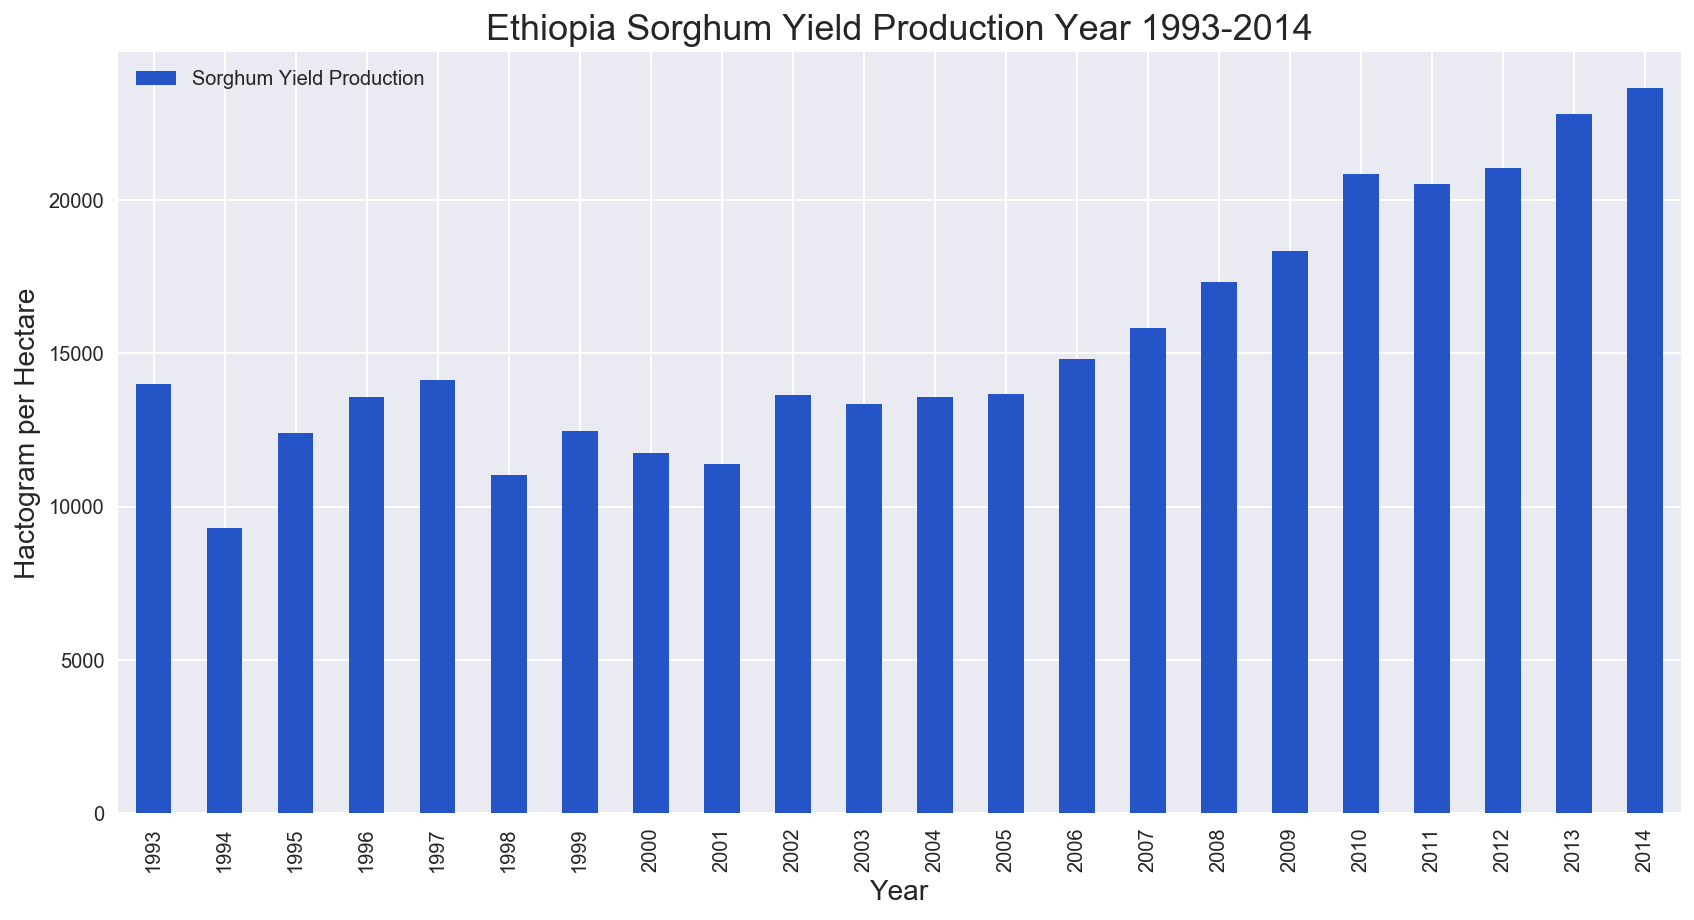

In [95]:
# Check the crop yield production over the years again. 
plt.figure(figsize = (14, 7))
final_df.crop_yield.plot(kind = 'bar', color = '#2554C7', label = 'Sorghum Yield Production')
plt.legend(loc ='best')
plt.title('Ethiopia Sorghum Yield Production Year 1993-2014', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Hactogram per Hectare', fontsize = 14)
plt.show()

---

#### Heatmap Visualization

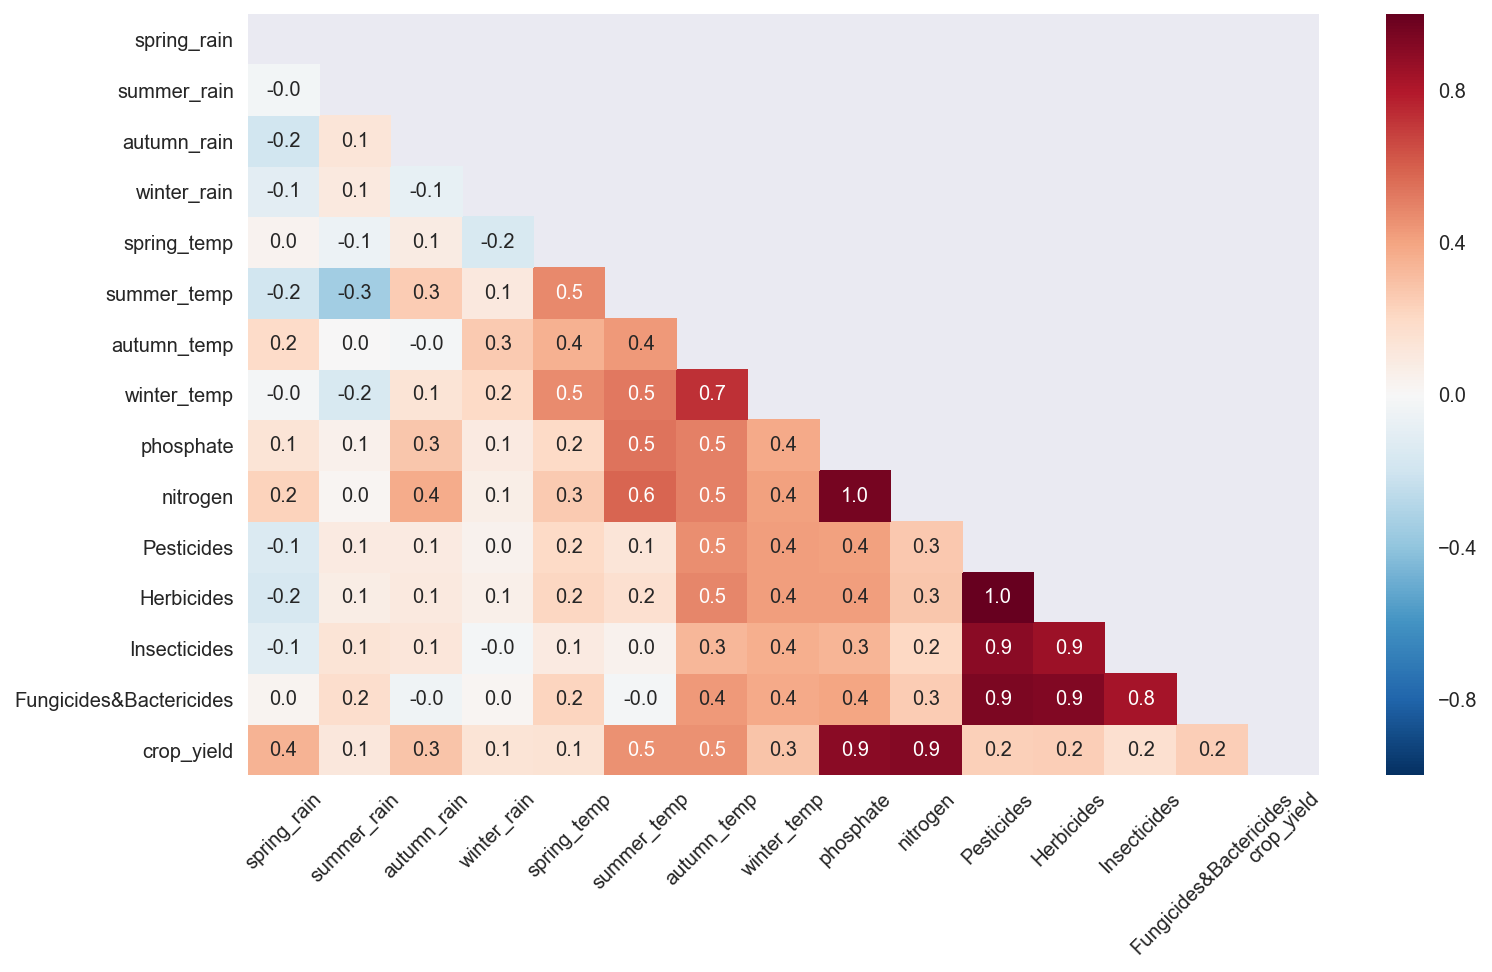

In [96]:
# Prior to fitting the data to machine learning, check the correlation of crop yields and the variables
# This provides a overall sense of the relationship between the independent variables 
# & the dependent variable -- the crop productions. 


corrmat = final_df.corr()
fig, ax = plt.subplots(figsize = (12,7))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corrmat, mask = mask, annot = True, fmt = '.1f')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, rotation = 45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, rotation = 0)
plt.show()

#### Correlation map shows there is a strong and positive relationship between crop yields and fertilizers, phosphate & nitrogen.

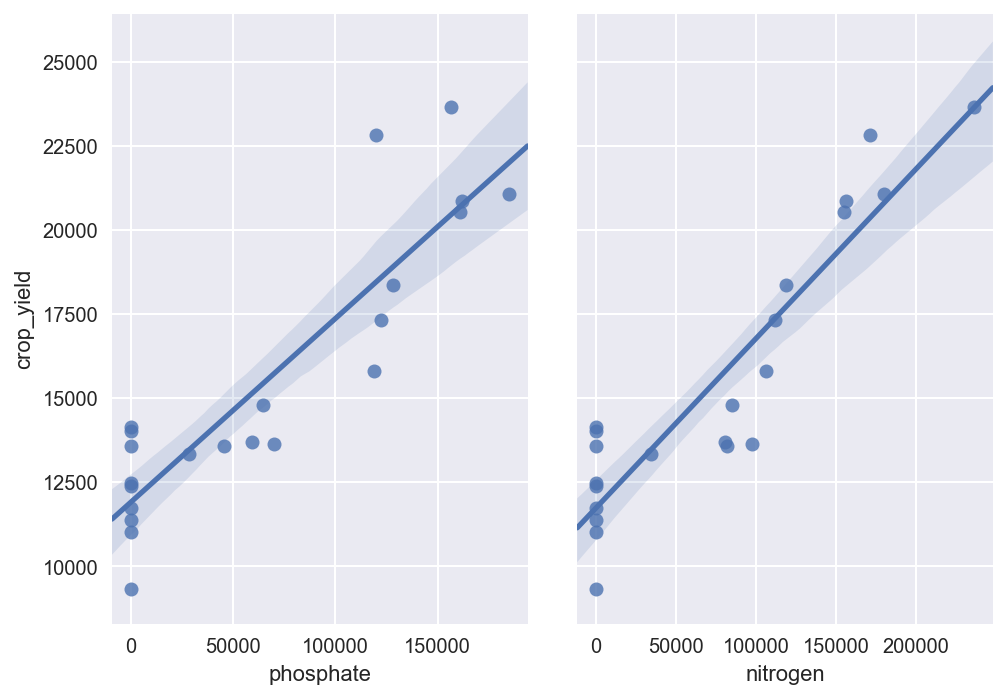

In [97]:
# Look at the pairplot between crop yields and fertilizers.
sns.pairplot(final_df, x_vars = ['phosphate', 'nitrogen'], 
            y_vars = 'crop_yield', size = 5, aspect = 0.7, kind = 'reg')
plt.show()

# the pairplots show strong positive relationship. It is somewhat linear. 


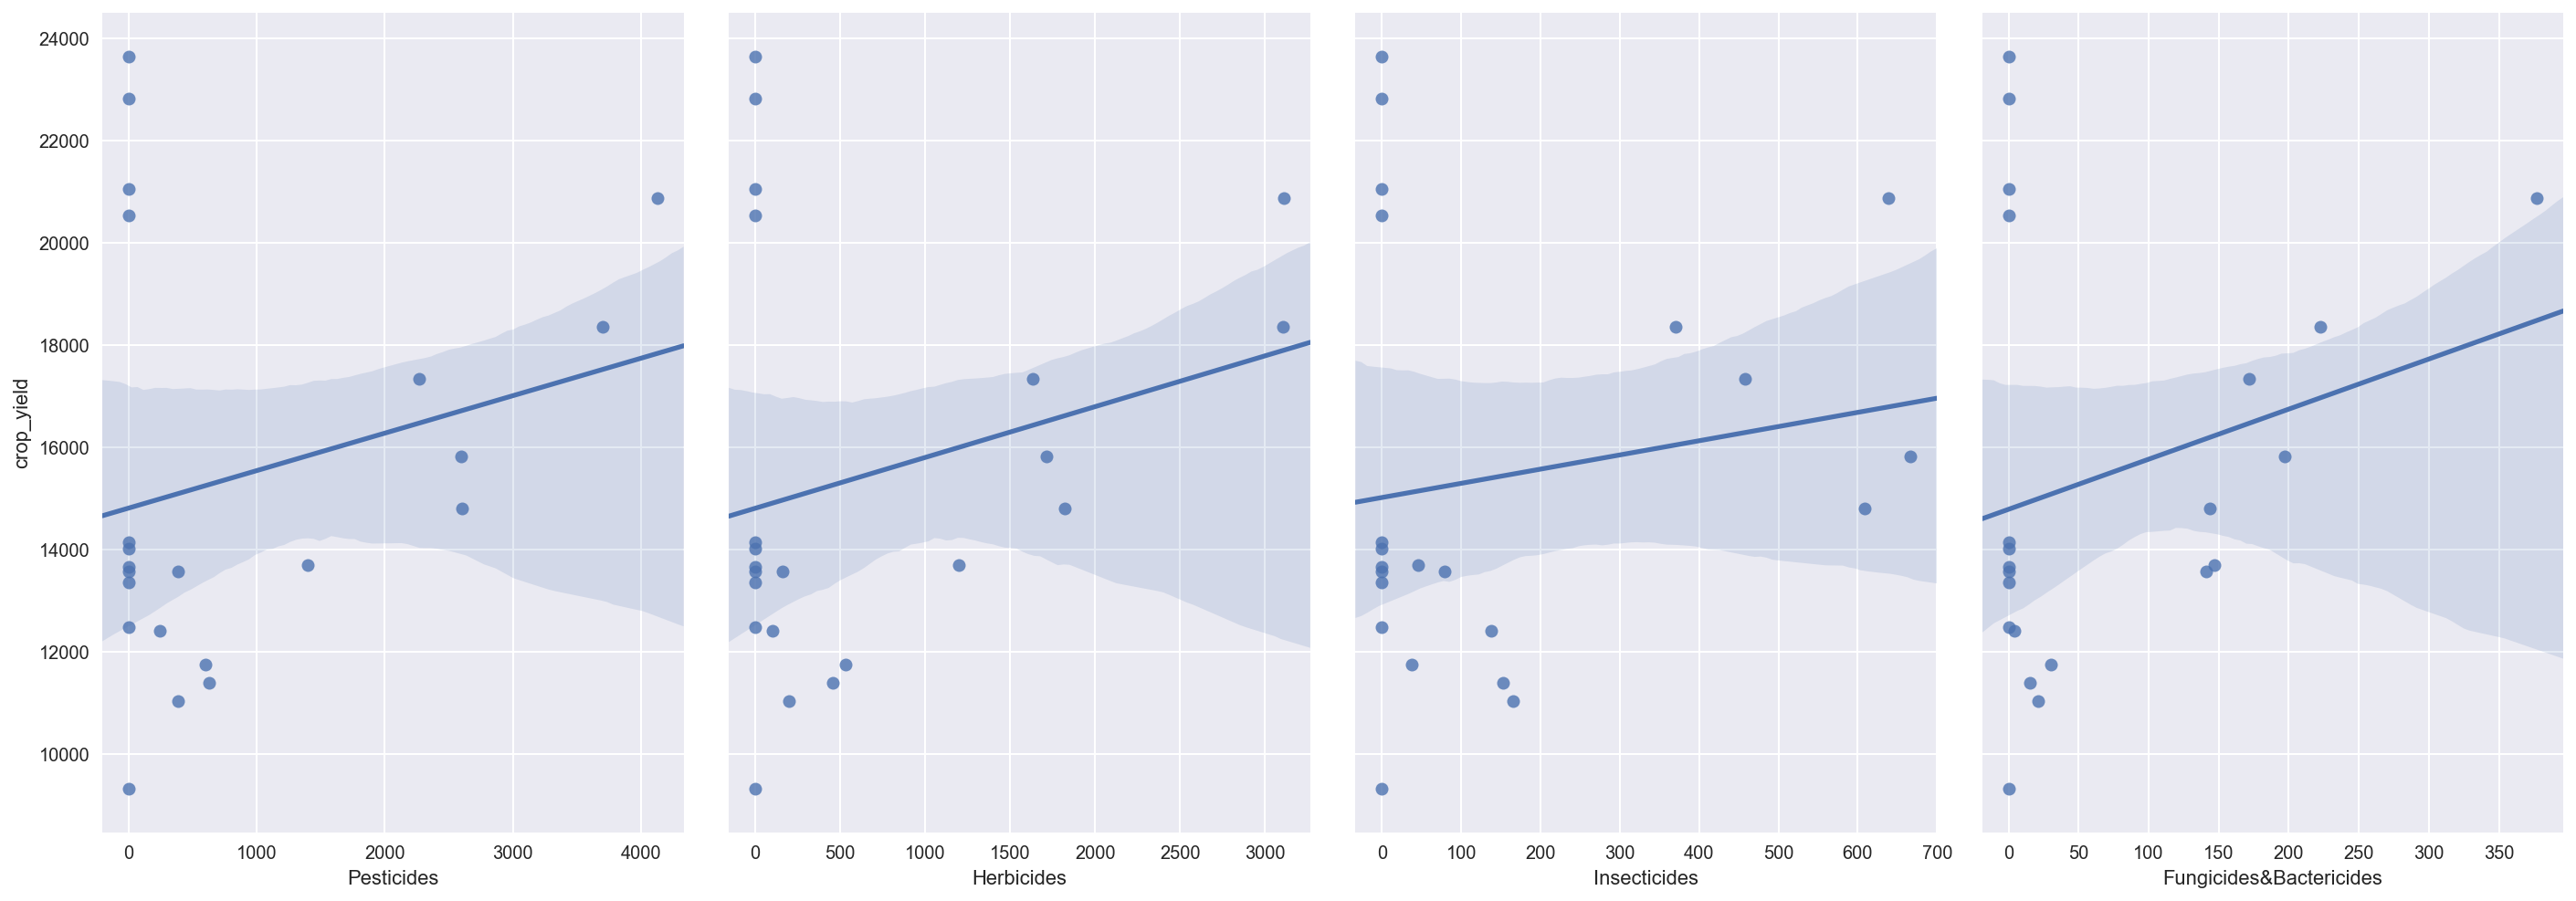

In [98]:
sns.pairplot(final_df, x_vars = ['Pesticides', 'Herbicides',
                             'Insecticides', 'Fungicides&Bactericides'], 
            y_vars = 'crop_yield', size = 7, aspect = 0.7, kind = 'reg')
plt.show()

# The pairplots shows a rather flat relationship between 
# crop yields and the pesticides and herbicides.

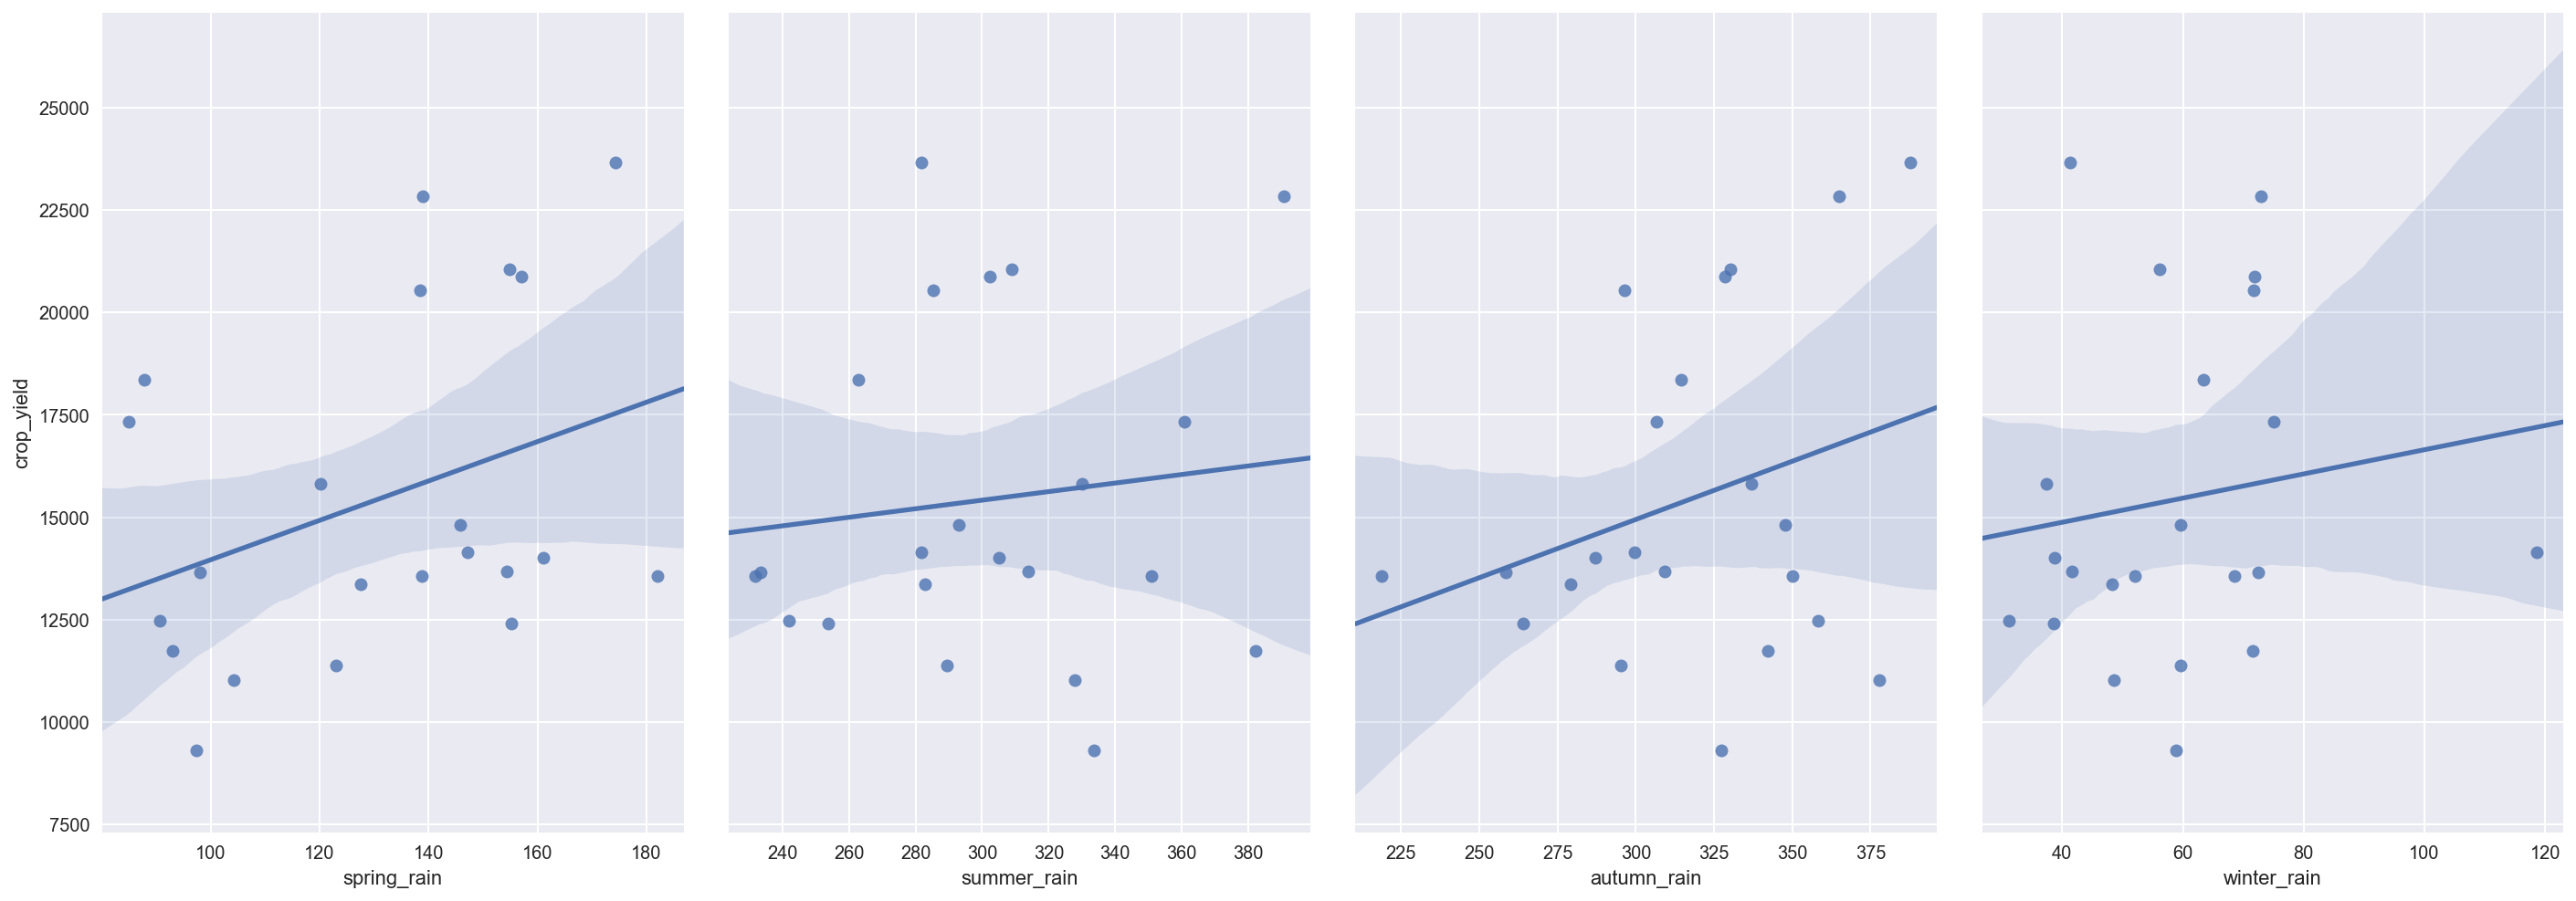

In [99]:
sns.pairplot(final_df, x_vars = ['spring_rain', 'summer_rain', 'autumn_rain', 'winter_rain'], 
            y_vars = 'crop_yield', size = 7, aspect = 0.7, kind = 'reg')
plt.show()

# The seasonal rains definitely not linear. However, the charts show spring and autumn rain 
# have a bigger impact than summer and winter rain.


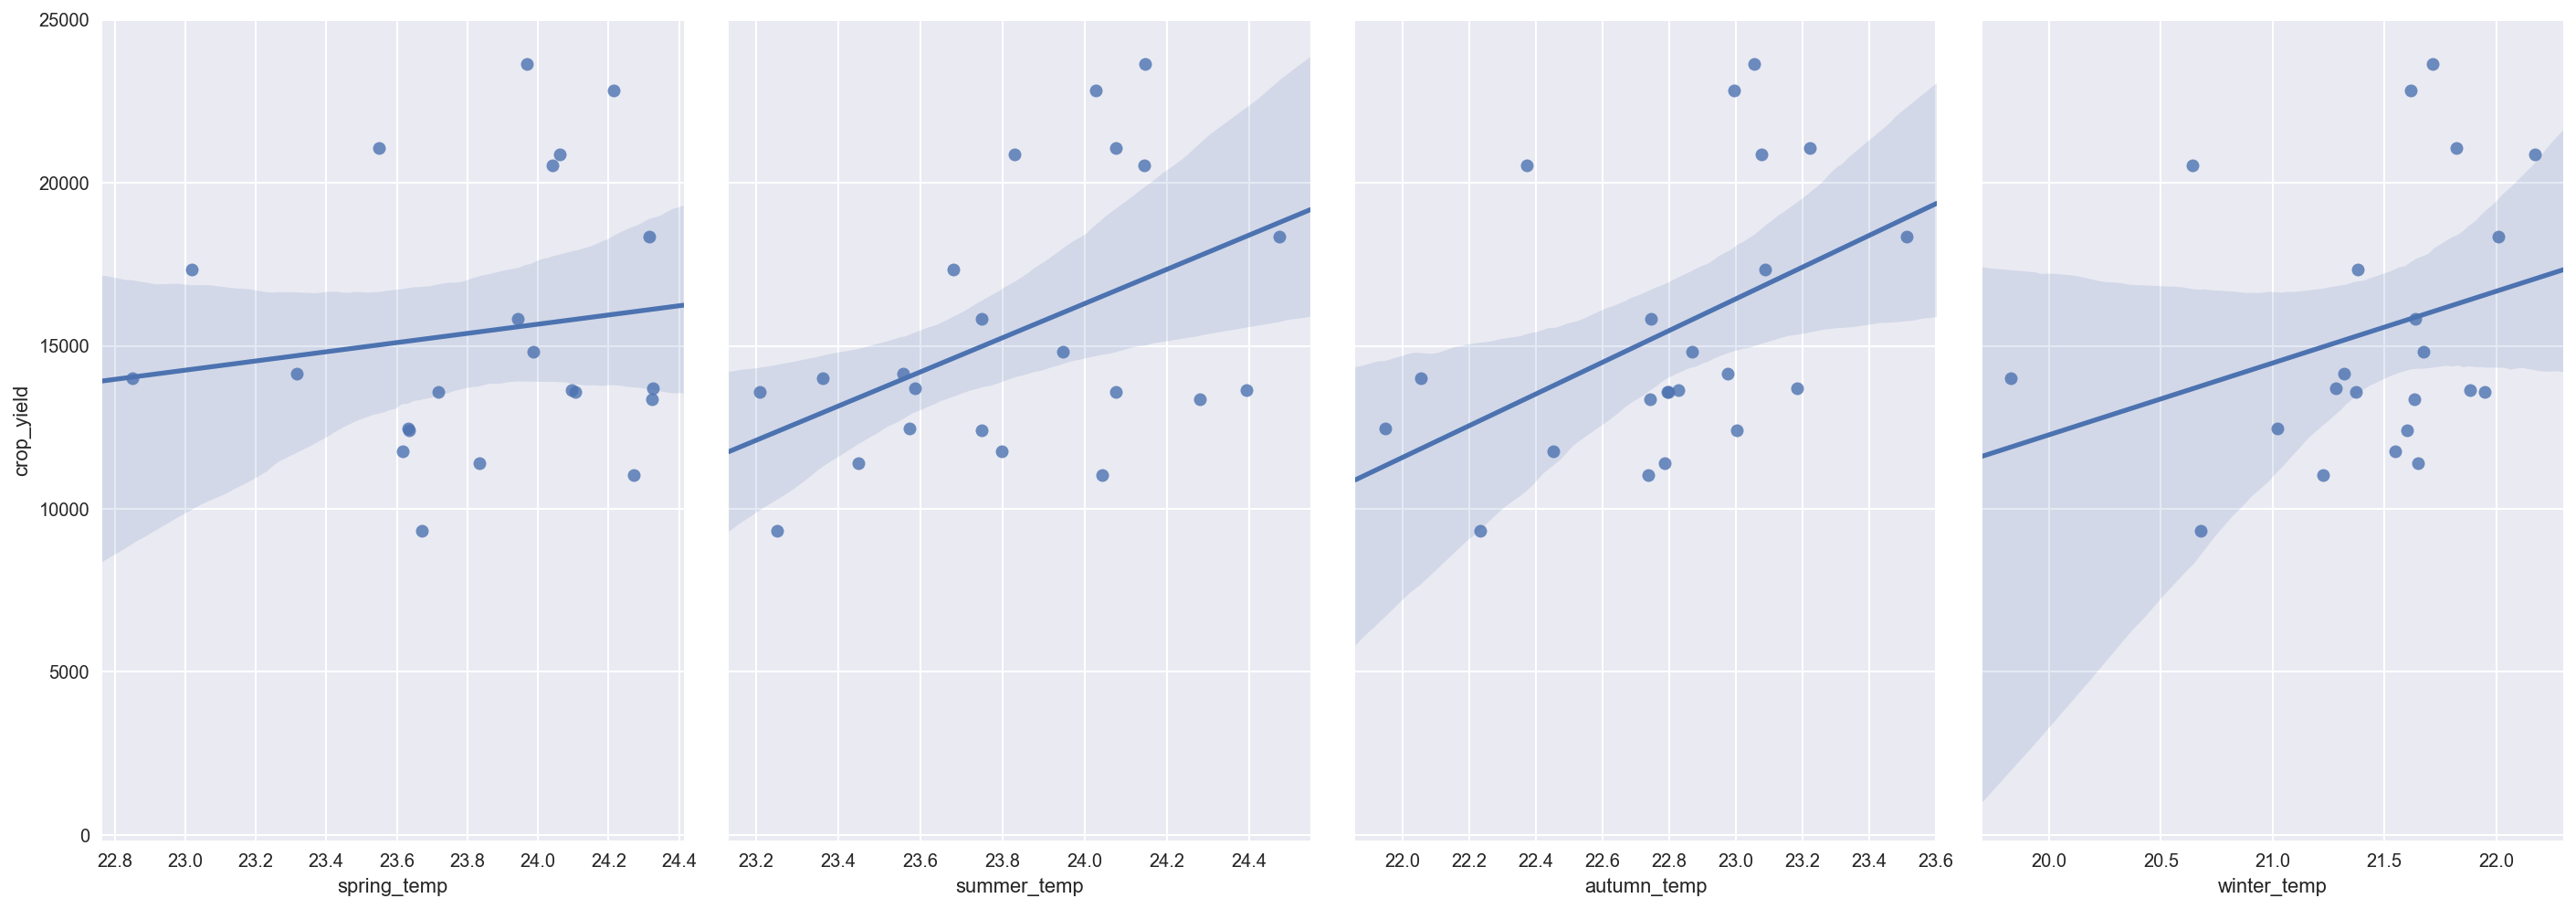

In [100]:
sns.pairplot(final_df, x_vars = ['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'], 
            y_vars = 'crop_yield', size = 7, aspect = 0.7, kind = 'reg')
plt.show()

# The temperature in summer, autumn, and winter also show quite 
# strong positive relationship with the crop yields. 

#### Look! The nitrogen, pesticide have a strong impact on the yield productions. 
#### Other features such as rain, temperature, and pesticides also have positive impact on yield production, but fertilizers seem to have a larger magnitude on yield production. 


## 3. Modeling 

Since the predict value is a continuous quantitative value and not very linear.  Non-linear types of regressor such as Support Vector Regressor, Decision Tree, and Random Forest Regressor would be the choice to use.


Let's try to compare four regression models
 
 - Support Vector Regressor
 - RandomForest Regressor
 - GradianBoosting Regressor
 

In [101]:
# Select features for training & prediction

crop_prod_feat = ['spring_rain', 'summer_rain', 'autumn_rain', 'winter_rain',
             'spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp',
            'nitrogen', 'phosphate', 'Pesticides', 'Herbicides', 'Insecticides',
            'Fungicides&Bactericides']


X = final_df[crop_prod_feat].values
y = final_df.crop_yield.values

print X.shape
print y.shape

# The independent variable X is a matrix and the dependent variable y is vector. Good.

(22, 14)
(22,)


#### Train Test Split
This is a very small dataset, only 22 observations. I decide to use 90% for data for fitting and 10% for testing. 
 

In [102]:
# Perform train-test 90/10 split
# 90 percent of the data for training and save 10 percent for prediction

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0 )
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


(19, 14) (19,)
(3, 14) (3,)


In [103]:
y_test

array([ 22825.,  13357.,  15817.])

#### Feature Scaling
Scaling data is very important because most of the machine learning models utilize Euclidian Distance method. To avoid the variables that have wide range such as fertilizers being dominate to the seasonal rains and temperatures, we need to make the data the same scale. 

Also, data with same scale allows machine to compute in a faster pace than wide range of data. 

In [104]:
# Scale the data for better performance

sc_X = StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)


In [105]:
y_test

array([ 1.97743362, -0.45841818,  0.17447107])

### Model 1:  Support Vector Regression (SVR)
Support Vector Regression perform well for non-linear problem and not bias due to outliners. This would be a good model to try. 

In [106]:
# Fit the SVR regression to the data. 
# Since this is a non-linear, Guassian rbf is the choice for the kernel. 

from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [107]:
# Compare the actual and predicted results.

compare_SVR_result = pd.DataFrame(data = {'Actual': sc_y.inverse_transform(y_test), 
                                          'SVR Prediction': sc_y.inverse_transform(y_pred_svr)})
compare_SVR_result

,Actual,SVR Prediction
0,22825.0,17713.633002
1,13357.0,13079.069940
2,15817.0,16074.549820


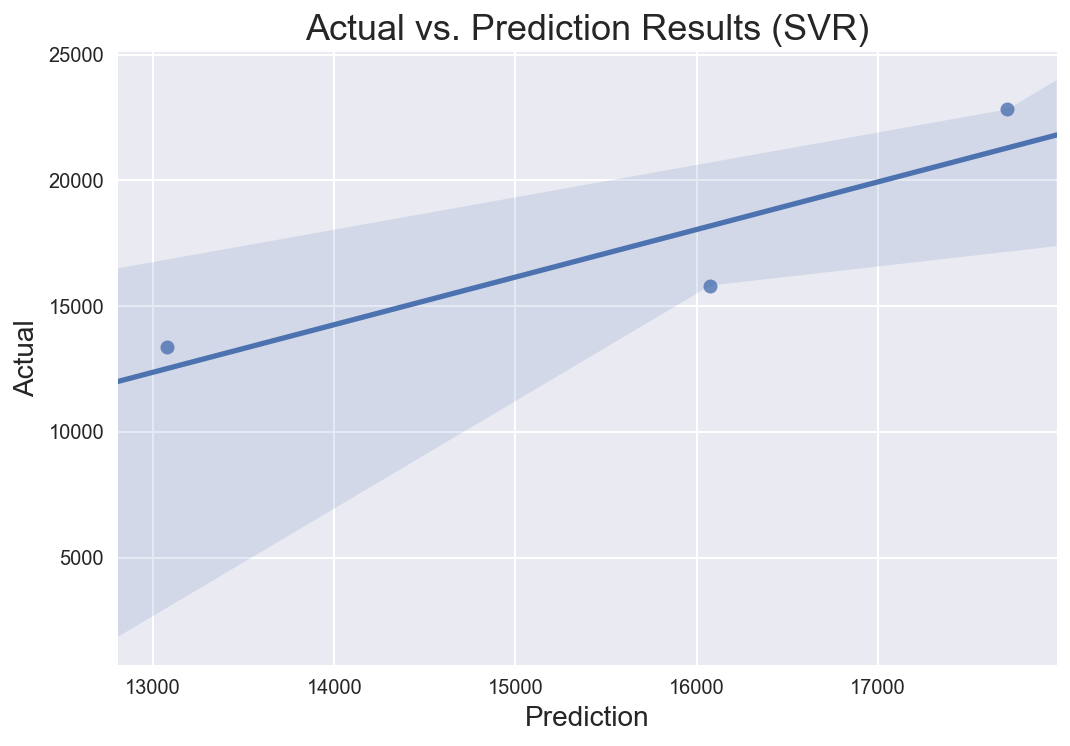

In [108]:
# Plot the support vector regression predictions and the actual observations together. 

sns.lmplot(x = 'SVR Prediction', y = 'Actual', data = compare_SVR_result, size = 5, 
           aspect=1.5)
plt.title('Actual vs. Prediction Results (SVR)', fontsize = 18)
plt.xlabel('Prediction', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.show()

In [109]:
# Measure the Root Mean Standard Error (RMSE). RMES is used for measuring prediction errors.
# The smaller the better. 

from sklearn import metrics
print 'SVR RMSE Score is: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr))


SVR RMSE Score is:  0.761305774536


#### Using Cross Validation Score to find the RMSE

Since we are validating a regression model, and we want to minimize the loss function, we use "mean squre error" scoring method when performing cross validation. Therefore, the score will be negative. 

In order to convert the score to positive and take a squre root, we need to perform additional calculation, convert the score to positive and take a square root of the score. 

In [110]:
from sklearn.model_selection import cross_val_score


print 'SVR Cross Validation Score is: ', 

np.sqrt(-cross_val_score(svr, X_train, y_train, cv = 5, scoring='mean_squared_error').mean())

SVR Cross Validation Score is: 

0.60479318631373169

### Model 2 - Random Forest Regressor

Random Forest is a fun algorithm. It is an average decision from teams of tree. When you have a forest voting for you, it deems to be powerful. Let's take a look how it compared to SVR. 

In [111]:
# Instantiate the Random Forest Regression Model
# Since this is a small dataset, I decide to use 1000 trees 
# to do the voting. 

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [112]:
y_pred_rf = rf.predict(X_test)

In [113]:
compare_rf_result = pd.DataFrame(data = {'Actual': sc_y.inverse_transform(y_test), 
                                         'RF Prediction': sc_y.inverse_transform(y_pred_rf)})
compare_rf_result

# The predictions compared to actual values are pretty close. 

,Actual,RF Prediction
0,22825.0,19941.250017
1,13357.0,12505.685100
2,15817.0,17683.671167


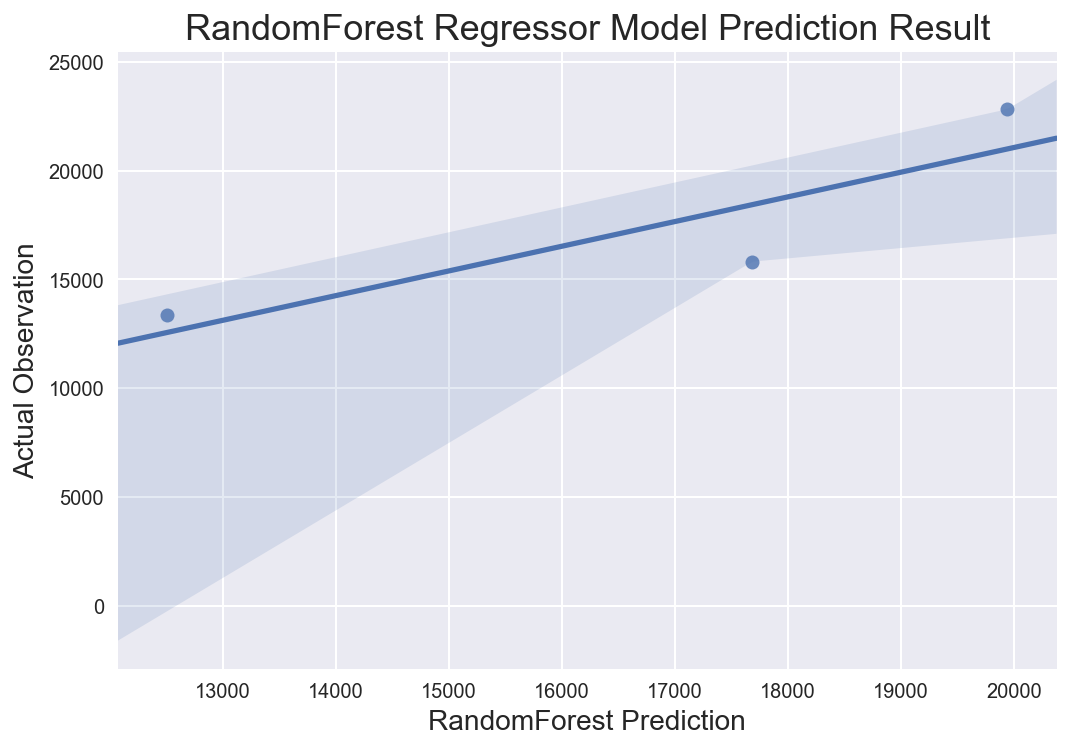

In [114]:
# Plot the random forest predictions and the actual observations together. 

sns.lmplot(x = 'RF Prediction', y = 'Actual', data = compare_rf_result, size = 5, aspect=1.5)
plt.title('RandomForest Regressor Model Prediction Result', fontsize = 18)
plt.xlabel('RandomForest Prediction', fontsize = 14)
plt.ylabel('Actual Observation', fontsize = 14)
plt.show()


In [115]:
print 'RandomForest RMSE Score is: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))

RandomForest RMSE Score is:  0.525683724511


In [116]:
print 'RaindomForest Cross Validation Score is: '
print (np.sqrt(-cross_val_score(rf, X_train, y_train, cv = 5, scoring = 'mean_squared_error').mean()))

RaindomForest Cross Validation Score is: 
0.43024236436


#### The RMES score for the Random Forest model is smaller than SVR. This means it is a better model. 

#### From Random Forest perspective, which features have the most positive impact on sorghum yields productions?

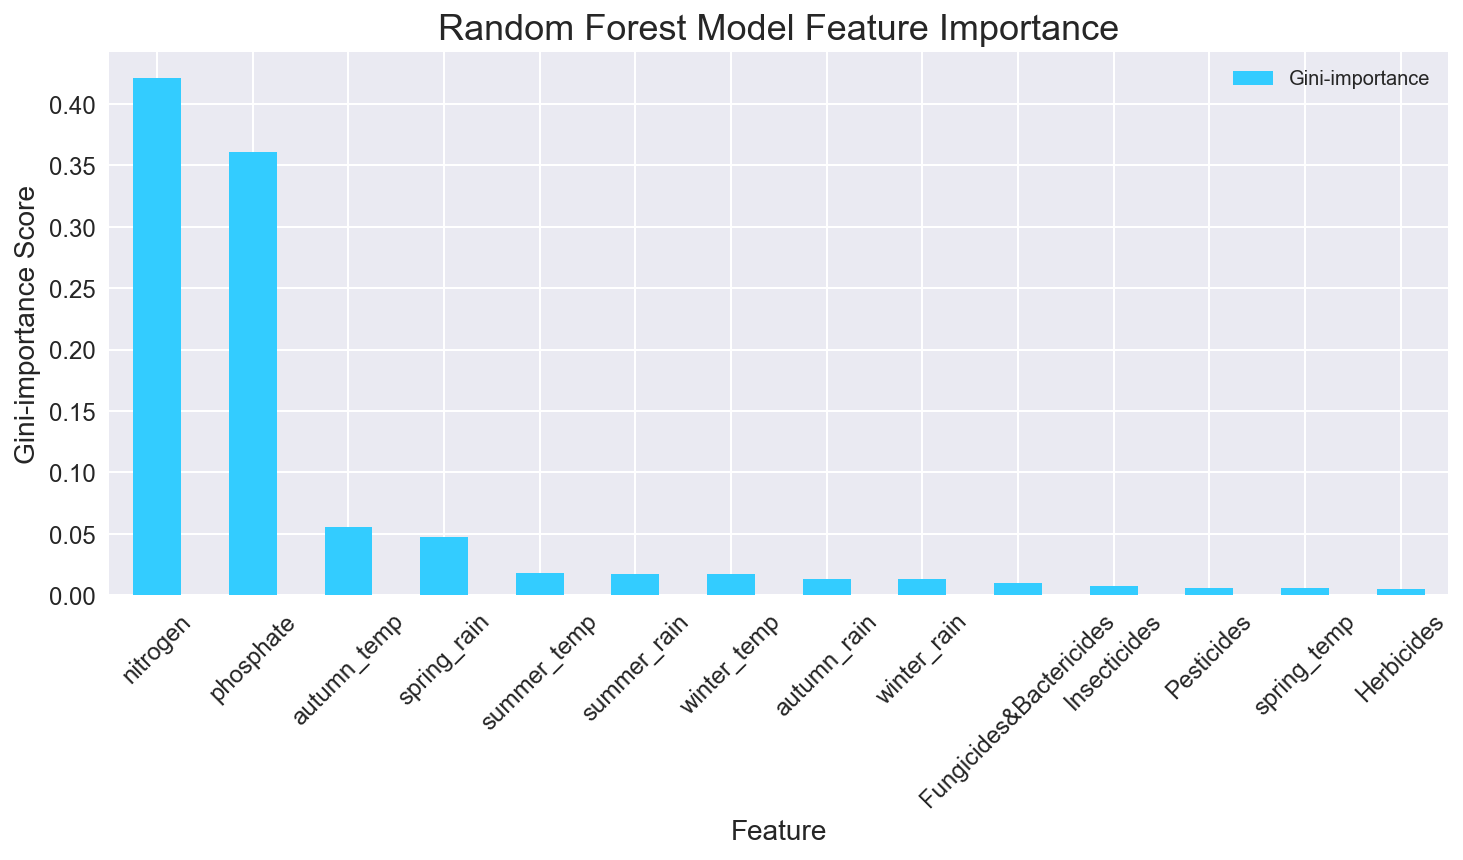

In [117]:
# Let's take a look at which features the forest find to 
# have a positive impact on sorghum yield production. 

best_rf_prod_feat = zip(crop_prod_feat, rf.feature_importances_)
best_rf_prod_feat = pd.DataFrame(best_rf_prod_feat)
best_rf_prod_feat.sort_values(by = 1, ascending=False)

rf_feats= {}
for feature, importance in zip(crop_prod_feat, rf.feature_importances_):
    rf_feats[feature] = importance
    
rf_feat_importances = pd.DataFrame.from_dict(rf_feats, orient='index').rename(columns={0:'Gini-importance'})
rf_feat_importances.sort_values(by='Gini-importance', ascending=False).plot(kind = 'bar', rot=45, figsize = (12,5), fontsize = 12, color = '#33CCFF')
plt.title('Random Forest Model Feature Importance', fontsize = 18)
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Gini-importance Score', fontsize = 14)
plt.show()

#### The Random Forest model suggests the fertilizers, especially nitrogen plays a very important role on sorghum yield improvement in Ethiopia. 
#### Since the invasive weed Striga can cause 50% of crop loss annually, one may expect herbicides also plays an important role in crop yield production. It turns out nitrogen also weeken Striga growth. This is the reason why nitrogen is very important. 


### Model 3: Gradient Boosting Regressor

Gradient Boosting, just like Random Forest, is also an ensemble machine learning algorithm. Gradient boosting is a series of learning steps by correcting previous step's learning errors. This is like a baby learning to walk and fall. The baby eventually learns the best way to walk by herself/himself. 

Let's take a look how Gradient Boosting perform. 



In [118]:
from sklearn.ensemble import GradientBoostingRegressor
gboost = GradientBoostingRegressor()
gboost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [119]:
y_pred_gboost = gboost.predict(X_test)

In [120]:
compare_gboost_result = pd.DataFrame(data = {'Actual': sc_y.inverse_transform(y_test),
                                             'gboost Prediction': sc_y.inverse_transform(y_pred_gboost)})
compare_gboost_result

,Actual,gboost Prediction
0,22825.0,20225.779921
1,13357.0,11431.352782
2,15817.0,18768.091589


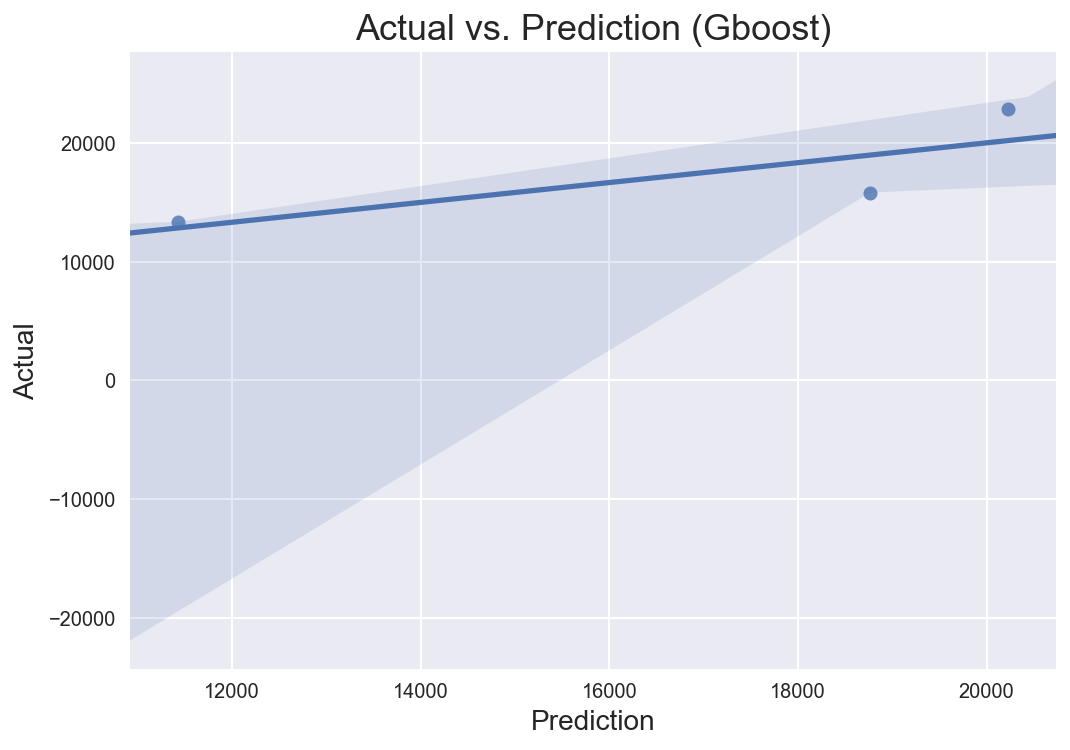

In [121]:
# Plot the Gradient Boosting predictions and the actual observations together. 

sns.lmplot(x = 'gboost Prediction', y = 'Actual', data = compare_gboost_result, size = 5, aspect=1.5)
plt.title('Actual vs. Prediction (Gboost)', fontsize = 18)
plt.xlabel('Prediction', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.show()



In [122]:
print 'Gradient Boosting RMSE Score is: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))

Gradient Boosting RMSE Score is:  0.525683724511


In [123]:
print 'Gradient Boosting Cross Validation Score is: '
print (np.sqrt(-cross_val_score(gboost, X_train, y_train, cv = 5, scoring = 'mean_squared_error').mean()))

Gradient Boosting Cross Validation Score is: 
0.47784753372


The gboost RMSE is lowest compared to SVR and Random Forest. 

Let's take a look at what features Gradient Boosting think the most important features affecting sorghum crop yields. 

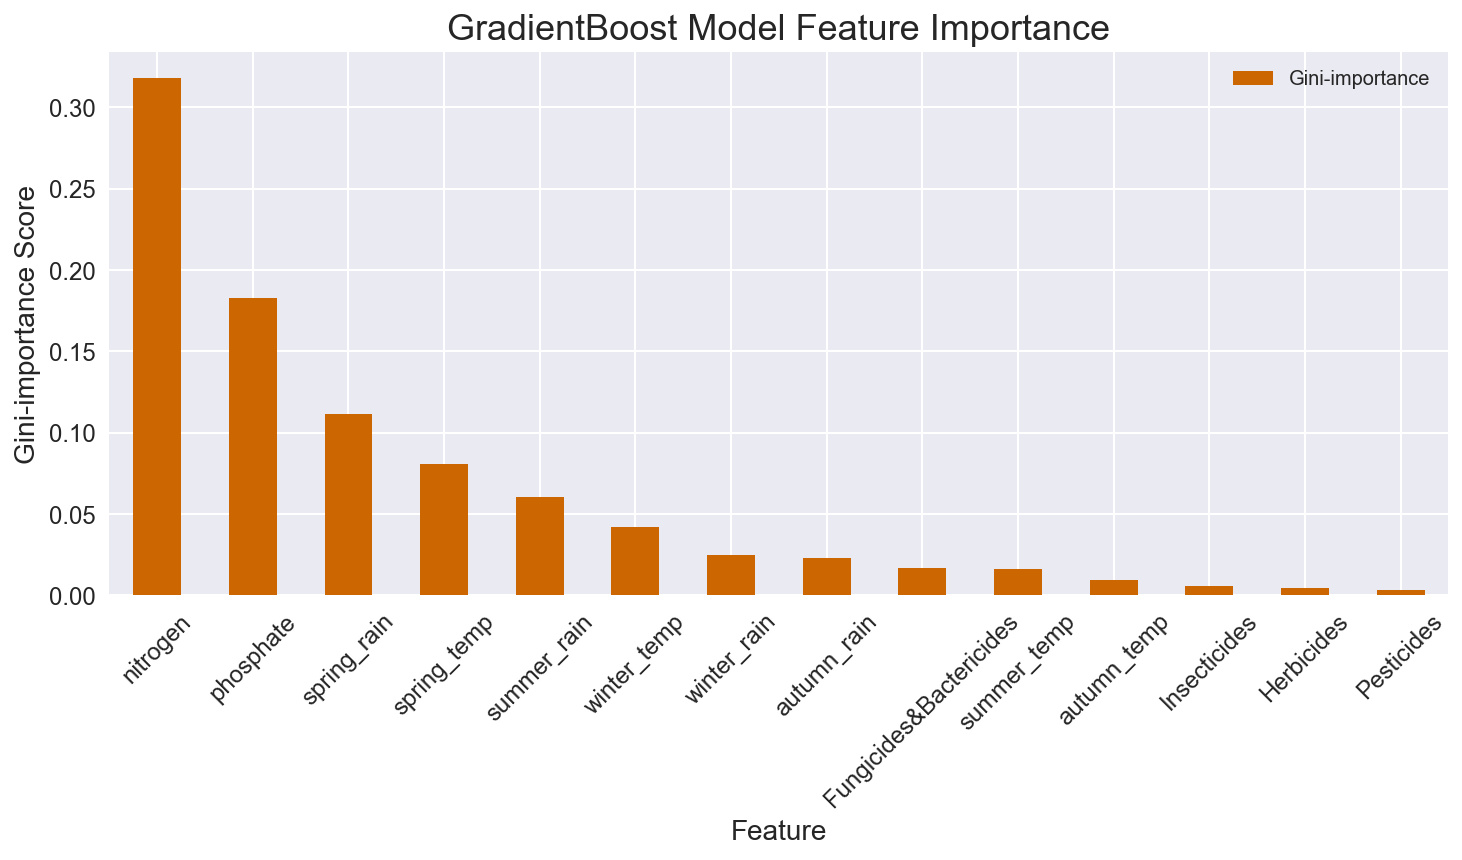

In [124]:
gboost_feat = zip(crop_prod_feat, gboost.feature_importances_)
gboost_feat = pd.DataFrame(gboost_feat)
gboost_feat.sort_values(by = 1, ascending=False)

gboost_feats= {}
for feature, importance in zip(crop_prod_feat, gboost.feature_importances_):
    gboost_feats[feature] = importance
    
gboost_feat_importances = pd.DataFrame.from_dict(gboost_feats, orient='index').rename(columns={0:'Gini-importance'})
gboost_feat_importances.sort_values(by='Gini-importance', ascending=False).plot(kind = 'bar', rot=45, figsize = (12,5), fontsize = 12, color = '#CC6600')
plt.title('GradientBoost Model Feature Importance', fontsize = 18)
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Gini-importance Score', fontsize = 14)
plt.show()   



* Both Random Forest and Gradient Boosting suggest fertilizers have the greatest impact on sorghum crop productions. 
* Summer & autumn temperatures are certainly important. As Ethiopia has highland temperatures, low temperature is a deterrent on sorghum growth. 
* It is very interesting both model also suggest the importance of spring rain & autumn rain. Ethiopia winter is extremely dry. Spring rain is essential to seeding and germination. Autumn is Ethiopia's raining season. It is a good time to conserve water for the drought winter & spring.


---

## Finding best parameters to improve score

When we run the SVR, Random Forest, and Gradient Boosting models, we use the default parameters. Let's try to use Gridsearch to find the best parameters for these models to minimize the RMSE. 

### - SVR with Gridsearch for best parameters

As mentioned, Support Vector Regression comes with three kernels. From the actual crop yield production over the years, we know it is a non-linear quantitative result. We tried the rbf(Radial Basis Function(Gaussian)) kernel previously. Between the polynomial and rbf, what if we let GridSearch to find which kernel the best for us along with other parameters?

In [125]:
from sklearn.model_selection import GridSearchCV

# Define parameters dictionary for SVR model
#In SVR, C paramter controls the tradeoff between smooth dicison boundary. 
# Gamma paramter define how far influence of a training example reaches. 

param_svr = [{'kernel': ['poly'], 
              'C': [1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01],
              'degree': [2,3]}, 
             {'kernel': ['rbf'], 
              'C': [1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01]}]

grid_search_svr = GridSearchCV(estimator = svr,
                              param_grid = param_svr,
                              cv = 5)
grid_search_svr = grid_search_svr.fit(X_train, y_train)

# Check the best parameters 
print(grid_search_svr.best_params_)

# Check the best score
# For regression GridSearchCV uses R2 for scoring.
print(grid_search_svr.best_score_)



{'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
0.610117339341


Gridsearh suggests this is not a polynomial and it is a rbf. The best parameter is C = 100 and gamma is 0.01. This results with R2 0.67. The closer to 1 is the better model. 

In [126]:
y_pred_gsvr = grid_search_svr.predict(X_test)

In [127]:
compare_gsvr_result = pd.DataFrame(data = {'Actual': sc_y.inverse_transform(y_test), 
                                           'GridSearch_SVR Prediction': sc_y.inverse_transform(y_pred_gsvr)})
compare_gsvr_result


,Actual,GridSearch_SVR Prediction
0,22825.0,17723.378196
1,13357.0,13403.791556
2,15817.0,16053.510564


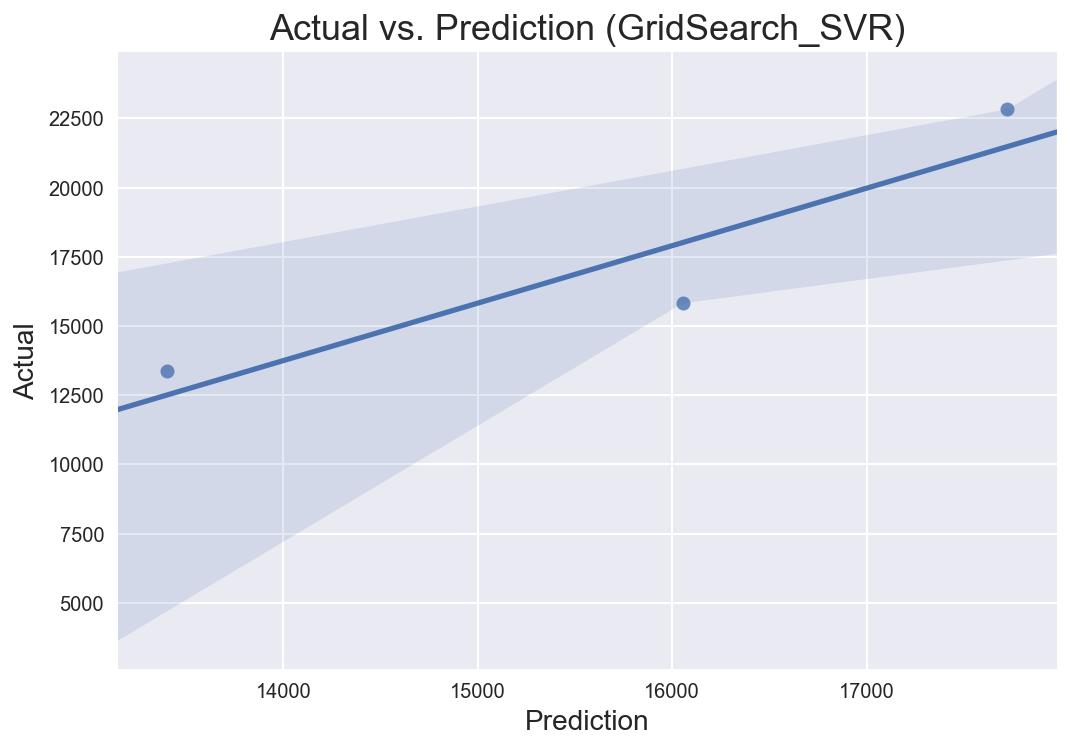

In [128]:
# Let's plot the actual and prediction results

sns.lmplot(x = 'GridSearch_SVR Prediction', y = 'Actual', data = compare_gsvr_result, size = 5, aspect=1.5)
plt.title('Actual vs. Prediction (GridSearch_SVR)', fontsize = 18)
plt.xlabel('Prediction', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.show()



In [129]:
print ('SVR with GridSearch Best Parameters Cross Validation Score is: ')
print (np.sqrt(-cross_val_score(grid_search_svr, X_train, y_train, cv = 5, scoring = 'mean_squared_error').mean()))


SVR with GridSearch Best Parameters Cross Validation Score is: 
0.586928487844


** The RMSE is 0.587 for SVR with Gridsearch. This is smaller than the SVR with default paramter 0.605, which is better.**


###  - Random Forest with GridSearch with best parameters

Now, let's take a look at Random Forest. Previously, we used 1000 trees. Let's see if more trees can help improve the model.

In [130]:
from sklearn.model_selection import GridSearchCV

# Define parameters dictionary for random forest model
# n_estimator is how many trees we want
# max_features defines how the data being splitted. 

param_rf = [{'n_estimators': [1000, 2000, 3000],
             'min_samples_leaf': [2,3],
            'max_features': ['auto', 'log2']
            }]

grid_search_rf = GridSearchCV(estimator = rf,
                              param_grid = param_rf,
                              cv = 5, 
                             n_jobs = -1)
grid_search_rf = grid_search_rf.fit(X_train, y_train)

# Check the best parameters 
print(grid_search_rf.best_params_)

# Check the best score
# For regression GridSearchCV uses R2 for scoring.
print(grid_search_rf.best_score_)

{'max_features': 'auto', 'n_estimators': 2000, 'min_samples_leaf': 2}
0.742726560686


Alright, Gridsearch suggests using 2000 trees is better than 1000 trees. 
max features didn't change but the 2 for the min samples leaf is better than 1. 

In [131]:
y_pred_grf = grid_search_rf.predict(X_test)

In [132]:
compare_grf_result = pd.DataFrame(data = {'Actual': sc_y.inverse_transform(y_test), 
                                          'GridSearch_rf Prediction': sc_y.inverse_transform(y_pred_grf)})
compare_grf_result



,Actual,GridSearch_rf Prediction
0,22825.0,20118.275847
1,13357.0,12412.860952
2,15817.0,18108.184545


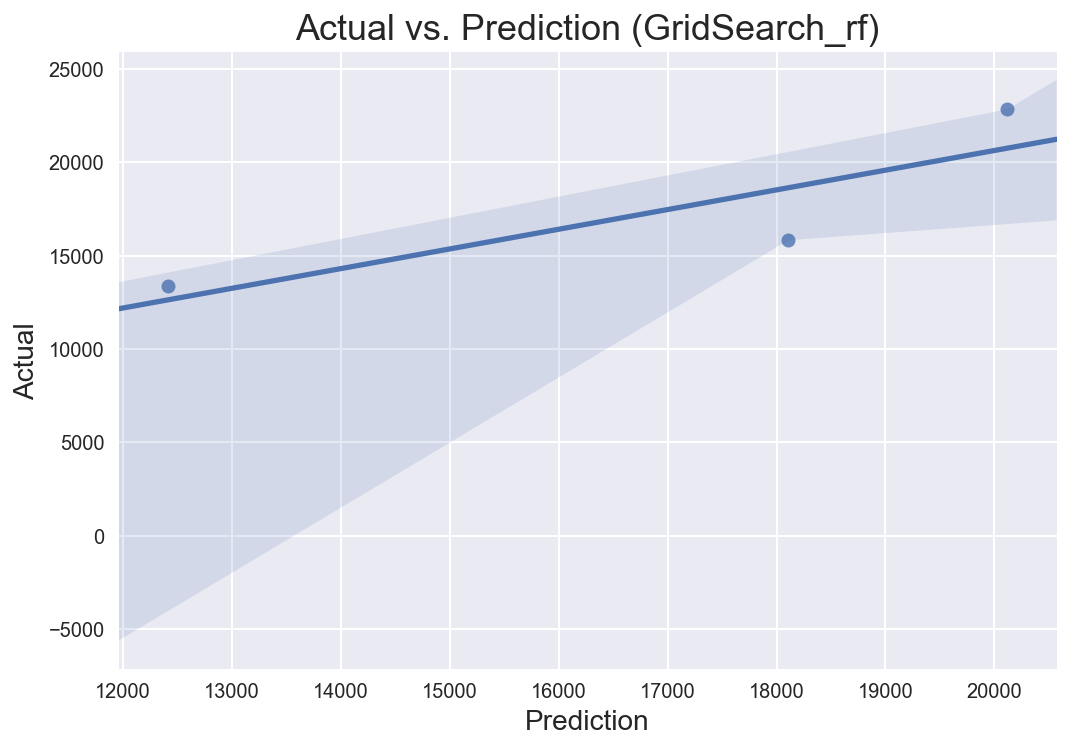

In [133]:
# Let's plot the actual and prediction results

sns.lmplot(x = 'GridSearch_rf Prediction', y = 'Actual', data = compare_grf_result, size = 5, aspect=1.5)
plt.title('Actual vs. Prediction (GridSearch_rf)', fontsize = 18)
plt.xlabel('Prediction', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.show()

In [134]:
# Let's check cross validation score. 

print ('Random Forest with GridSearch Best Parameters Cross Validation Score is: ')
print (np.sqrt(-cross_val_score(grid_search_rf, X_train, y_train, cv = 5, scoring = 'mean_squared_error').mean()))



Random Forest with GridSearch Best Parameters Cross Validation Score is: 
0.434016904161


The result is here. The RMSE is 0.434. Since RMSE is a loss function, the less we lose, the better. Therefore, comparing to SVR with GridSearch. However, the cross validation score for Random Forest with default parameters seem to perform slightly better, 0.430. 

### Gboost with Gridsearch for Best Parameters
Gboost performs quite well with default parameters. Let's tune in better parameters and see if it can perform better than Random Forest. 

In [135]:
from sklearn.model_selection import GridSearchCV

# Define parameters dictionary for random forest model
# n_estimator is how many trees we want
# Since gboost is a series of learning and correction steps, usually the smaller the better. 
# This allows the machine to learn from very simple split to more complex splitting small step
# by step. 

param_gboost = [{'n_estimators': [1000, 2000, 3000],
             'max_depth': [2, 3, 4, 5],
            'learning_rate': [0.02, 0.03, 0.04, 0.05]
            }]

grid_search_gboost = GridSearchCV(estimator = gboost,
                              param_grid = param_gboost,
                              cv = 5, 
                             n_jobs = -1)
grid_search_gboost = grid_search_gboost.fit(X_train, y_train)

# Check the best parameters 
print(grid_search_gboost.best_params_)

# Check the best score
# For regression GridSearchCV uses R2 for scoring.
print(grid_search_gboost.best_score_)



{'n_estimators': 1000, 'learning_rate': 0.03, 'max_depth': 3}
0.585165089646


Gradient Boosting with Gridsearch suggests using 2000 trees with 0.03 learning rate. 

In [136]:
y_pred_ggboost = grid_search_gboost.predict(X_test)

In [137]:
compare_ggboost_result = pd.DataFrame(data = {'Actual': sc_y.inverse_transform(y_test), 
                                             'GridSearch_gboost Prediction': sc_y.inverse_transform(y_pred_ggboost)})
compare_ggboost_result


,Actual,GridSearch_gboost Prediction
0,22825.0,20379.595786
1,13357.0,11476.607585
2,15817.0,19276.888595


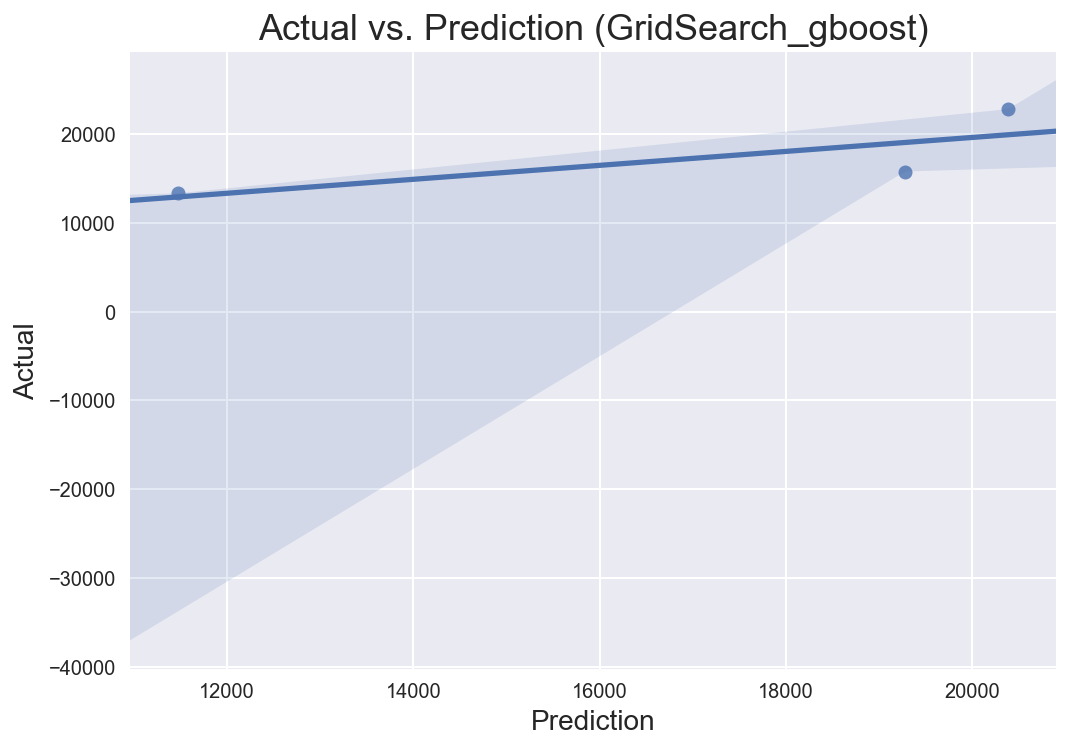

In [138]:
# Let's plot the actual and prediction results

sns.lmplot(x = 'GridSearch_gboost Prediction', y = 'Actual', data = compare_ggboost_result, size = 5, aspect=1.5)
plt.title('Actual vs. Prediction (GridSearch_gboost)', fontsize = 18)
plt.xlabel('Prediction', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.show()

In [139]:
# Let's check cross validation score. 

print ('Gradient Boosting with GridSearch Best Parameters Cross Validation Score is: ')
print (np.sqrt(-cross_val_score(grid_search_gboost, X_train, y_train, cv = 5, scoring = 'mean_squared_error').mean()))


Gradient Boosting with GridSearch Best Parameters Cross Validation Score is: 
0.503622826655


The cross validation RMSE for Gradient Boosting with best parameter is 0.503, not as good as the Random Forest model. However, it is still a very good model considering the small RMSE. 

Continue fine tuning the parameters may achieve better results.

## 4. Score Comparision

Let's put all the scores together and compare.

In [141]:
Model = ['SVR Default Parameters', 'SVR with GridSearch', 
         'Random Forest Default Parameters', 'Random Forest GridSearch',
         'Gradient Boosting Default Parameters', 'Gradient Boosting GridSearch']
Score = [0.605, 0.587, 0.430, 0.434, 0.478, 0.503]

score_compare = pd.DataFrame(data = {'Model': Model, 'Score': Score})
score_compare
                            

,Model,Score
0,SVR Default Parameters,0.605
1,SVR with GridSearch,0.587
2,Random Forest Default Parameters,0.430
3,Random Forest GridSearch,0.434
4,Gradient Boosting Default Parameters,0.478
5,Gradient Boosting GridSearch,0.503


### For this dataset, Random Forest comparably has the lowest RMSE score:

### Parameters: 1000 trees. 

## 5. Conclusion 

Using the same data and train test split 90/10, both Random Forest and Gradient Boosting Ensemble models come out far better than Support Vector Regression model.

Both Random Forest and Gradient Boosting models suggest fertilizer nitrogen is an essential element for crop yield production. This would be the feature we need to focus on optimizing crop yield productions. 

Ethiopia's winter is extremely dry. The droughts in winter have serve impact on seeding and growing seasons. Ethiopia's raining seasons are spring and autumn. Ethiopia should implement water conservation program to conserve rain during spring and autumn to supplement the drought seasons summer and winter. 

To improve prediction accuracy, additional variables such as agriculture machinery usage, funding, and government support should also be included for further analysis and yield improvements.


#### Data from Food and Agriculture Organiztion of the United Nations

http://www.fao.org/faostat/en/#home